## Step 1 — Load All Scraped CSV Files

Load all files from carData/, concatenate them into one DataFrame, and preview the combined dataset.

In [650]:
import pandas as pd
import glob

# Load all brand-specific CSVs
csv_files = glob.glob("../carData/*.csv")

print("Files found:", len(csv_files))
for f in csv_files:
    print("  •", f)

# Merge into a single DataFrame
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print("Dataset shape:", df.shape)
df.sample(6)

Files found: 24
  • ../carData\cars_audi.csv
  • ../carData\cars_bmw.csv
  • ../carData\cars_chevrolet.csv
  • ../carData\cars_citroen.csv
  • ../carData\cars_dacia.csv
  • ../carData\cars_fiat.csv
  • ../carData\cars_ford.csv
  • ../carData\cars_honda.csv
  • ../carData\cars_hyundai.csv
  • ../carData\cars_kia.csv
  • ../carData\cars_mazda.csv
  • ../carData\cars_mercedes-benz.csv
  • ../carData\cars_mitsubishi.csv
  • ../carData\cars_nissan.csv
  • ../carData\cars_opel.csv
  • ../carData\cars_peugeot.csv
  • ../carData\cars_renault.csv
  • ../carData\cars_seat.csv
  • ../carData\cars_skoda.csv
  • ../carData\cars_suzuki.csv
  • ../carData\cars_tesla.csv
  • ../carData\cars_toyota.csv
  • ../carData\cars_volkswagen.csv
  • ../carData\cars_volvo.csv
Dataset shape: (11921, 12)


,marca,model,pret,capacitate motor,putere,combustibil,caroserie,rulaj,culoare,an fabricatie,cutie viteza,descriere
1201,bmw,Seria 3,1 800 €,1 895 cm³,105 CP,Benzina,Berlina,290 000 km,Argintiu,2000.0,Manuala,"Vând BMW E46, an fabricație 2000, motor 1.9 be..."
3047,fiat,Qubo,2 500 €,1 300 cm³,90 CP,Diesel,Monovolum,183 576 km,Alb,2012.0,Manuala,Fiat Qubo 1.3 Diesel 90 Cp 2012\nTelefon ０７２８５...
5349,mazda,MX-5,4 699 €,1 600 cm³,110 CP,Benzina,Cabrio,134 877 km,Rosu,1999.0,Manuala,Vând Mazda MX-5 (Miata) NB\n​An Fabricație: 19...
2028,citroen,C3,1 000 €,1 398 cm³,68 CP,Diesel,Berlina,146 000 km,Alb,2007.0,Manuala,Se vinde masina personala Citroen C3 an 2007 m...
9011,seat,Ibiza,6 699 lei,1 423 cm³,70 CP,Diesel,Hatchback,170 000 km,Gri,2007.0,Manuala,"Vând Seat Ibiza 2007, 1.4 TDI, 51kw, consum mi..."
2856,dacia,Dokker,5 300 €,1 461 cm³,90 CP,Diesel,Break,162 000 km,Gri,2014.0,Manuala,"Dacia Dokker .\n11.2014\n1,5 diesel\nEuro 5\n1..."


## 🧹 Step 2 — Clean and prepare the dataset

Goals:

Convert text fields into numeric values

price → "10 500 €" → 10500.0

capacitate motor → "1 995 cm³" → 1995

putere → "184 CP" → 184

rulaj → "280 000 km" → 280000

an fabricatie → "2012" → 2012

Drop the descriere column (not useful for the training of the model).

Remove rows where key numeric fields are missing.

Store in a copy of the data frame to keep the original safe

In [651]:
import numpy as np

# Create copy
df_clean = df.copy()

# --- Clean price: remove non-digits (€, spaces, lei) and convert to float
df_clean['pret'] = (
    df_clean['pret']
      .astype(str)
      .str.replace(r'[^\d]', '', regex=True)    # keep only digits
      .replace('', np.nan)                      # empty -> NaN
      .astype(float)
)

# --- Clean engine capacity: "1 995 cm³" -> 1995
df_clean['capacitate motor'] = (
    df_clean['capacitate motor']
      .astype(str)
      .str.replace(' ', '', regex=False)        # remove spaces
      .str.extract(r'(\d+)')      # first number sequence
      .astype(float)
)

# --- Clean power: "184 CP" -> 184
df_clean['putere'] = (
    df_clean['putere']
      .astype(str)
      .str.extract(r'(\d+)', expand=False)
      .astype(float)
)

# --- Clean mileage: "280 000 km" -> 280000
df_clean['rulaj'] = (
    df_clean['rulaj']
      .astype(str)
      .str.replace(' ', '', regex=False)
      .str.extract(r'(\d+)')      # take first numeric block
      .astype(float)
)

# --- Clean year: extract 4 digits
df_clean['an fabricatie'] = (
    df_clean['an fabricatie']
      .astype(str)
      .str.extract(r'(\d{4})', expand=False)
      .astype(float)
)

# Drop free-text description (not used in this version of the model)
if 'descriere' in df_clean.columns:
    df_clean = df_clean.drop(columns=['descriere'])

# Drop rows where key numeric fields are missing
key_numeric = ['pret', 'capacitate motor', 'putere', 'rulaj', 'an fabricatie']
df_clean = df_clean.dropna(subset=key_numeric)

# Convert numeric columns to int where it makes sense
for col in ['capacitate motor', 'putere', 'rulaj', 'an fabricatie']:
    df_clean[col] = df_clean[col].astype(int)

df_clean['pret'] = df_clean['pret'].astype(float)

print("Shape after cleaning:", df_clean.shape)
print("\nDtypes:")
print(df_clean.dtypes)

df_clean.head(-8)


Shape after cleaning: (9766, 11)

Dtypes:
marca                object
model                object
pret                float64
capacitate motor      int64
putere                int64
combustibil          object
caroserie            object
rulaj                 int64
culoare              object
an fabricatie         int64
cutie viteza         object
dtype: object


,marca,model,pret,capacitate motor,putere,combustibil,caroserie,rulaj,culoare,an fabricatie,cutie viteza
0,audi,A8,5800.0,3000,232,Diesel,Berlina,340000,Albastru,2007,Automata
1,audi,TT,6990.0,1998,170,Diesel,Coupe,245000,Negru,2009,Manuala
3,audi,A4,9900.0,1968,177,Diesel,Break,238200,Alb,2014,Automata
4,audi,A6,3490.0,1998,177,Diesel,Berlina,150000,Gri,2011,Manuala
5,audi,TT,8450.0,1968,170,Diesel,Coupe,238000,Albastru,2008,Manuala
...,...,...,...,...,...,...,...,...,...,...,...
11904,volvo,V40,6800.0,1969,120,Diesel,Hatchback,230000,Gri,2015,Manuala
11906,volvo,V40,5950.0,1560,115,Diesel,Hatchback,222294,Gri,2013,Manuala
11907,volvo,V60,14000.0,1969,150,Diesel,Break,233000,Alb,2019,Automata
11908,volvo,XC 40,20500.0,1996,150,Diesel,SUV,216000,Alb,2020,Manuala


## Step 3 - 📊 Exploratory Data Analysis (EDA)

This section provides visualizations to better understand the distribution and relationships inside the car dataset after scraping and cleaning.

In [652]:
# ============================================
# 1. SETUP
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option('display.max_columns', None)

# Create output folder
SAVE_DIR = "plots/eda_cleaned_data"
os.makedirs(SAVE_DIR, exist_ok=True)


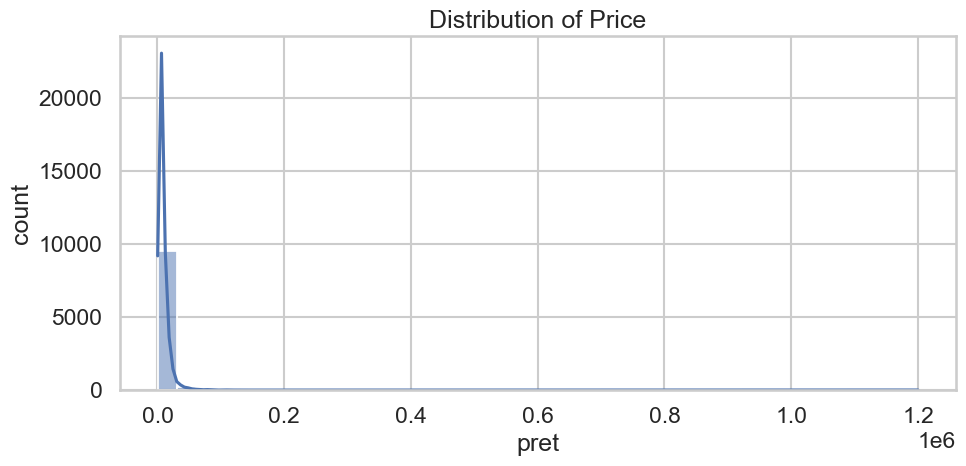

In [653]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["pret"], kde=True, bins=40)
plt.title("Distribution of Price")
plt.xlabel("pret")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/price_distribution.png", dpi=140)
plt.show()


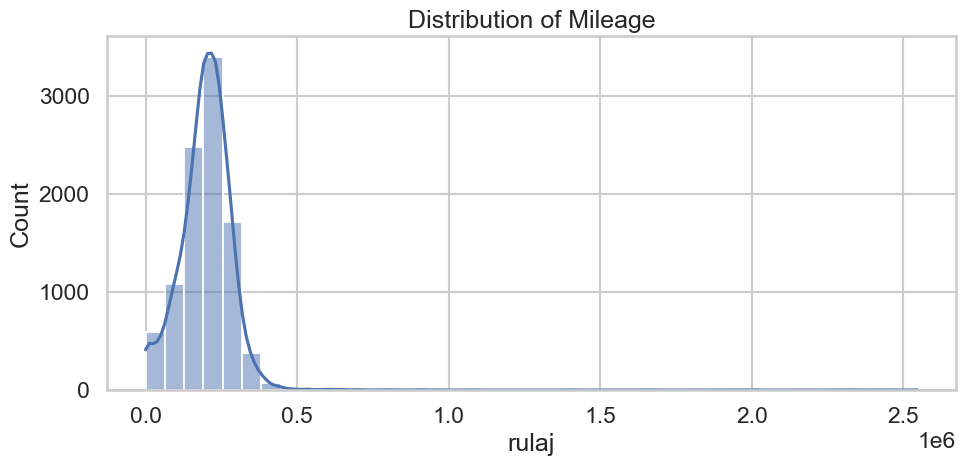

In [654]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["rulaj"], kde=True, bins=40)
plt.title("Distribution of Mileage")
plt.xlabel("rulaj")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/mileage_distribution.png", dpi=140)
plt.show()


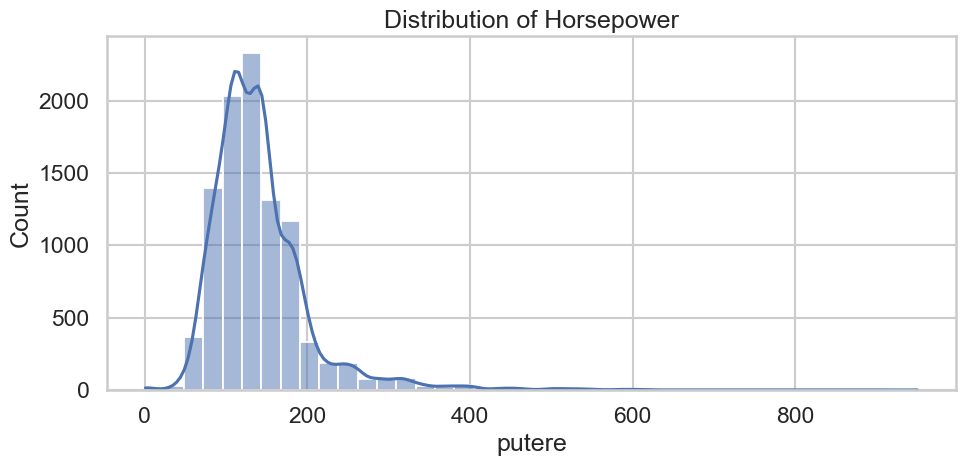

In [655]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["putere"], kde=True, bins=40)
plt.title("Distribution of Horsepower")
plt.xlabel("putere")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/power_distribution.png", dpi=140)
plt.show()


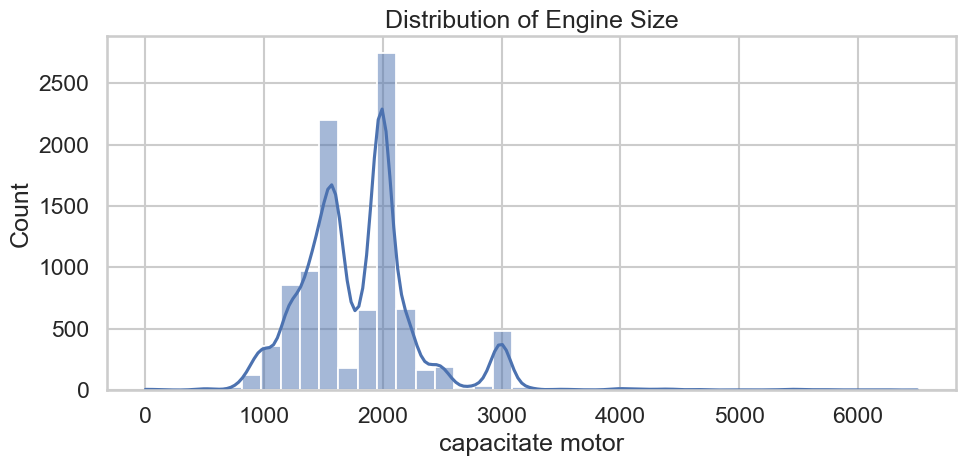

In [656]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["capacitate motor"], kde=True, bins=40)
plt.title("Distribution of Engine Size")
plt.xlabel("capacitate motor")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/engine_distribution.png", dpi=140)
plt.show()


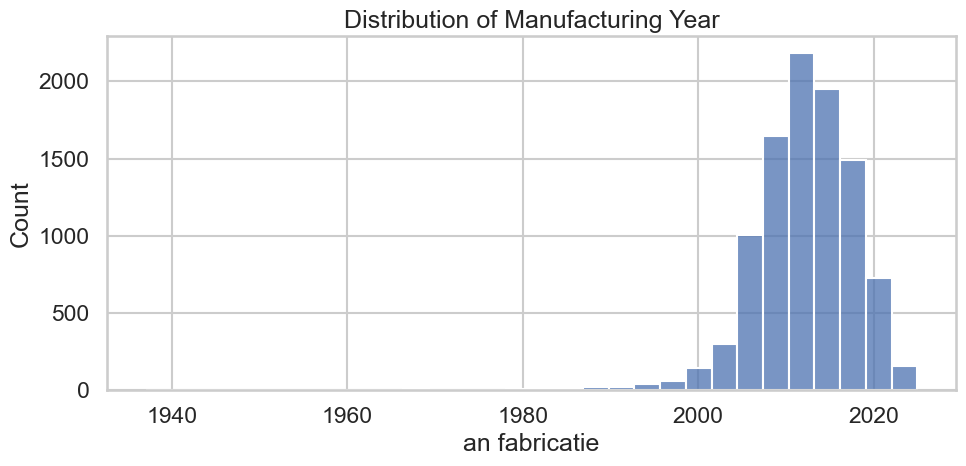

In [657]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean["an fabricatie"], bins=30, kde=False)
plt.title("Distribution of Manufacturing Year")
plt.xlabel("an fabricatie")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/year_distribution.png", dpi=140)
plt.show()


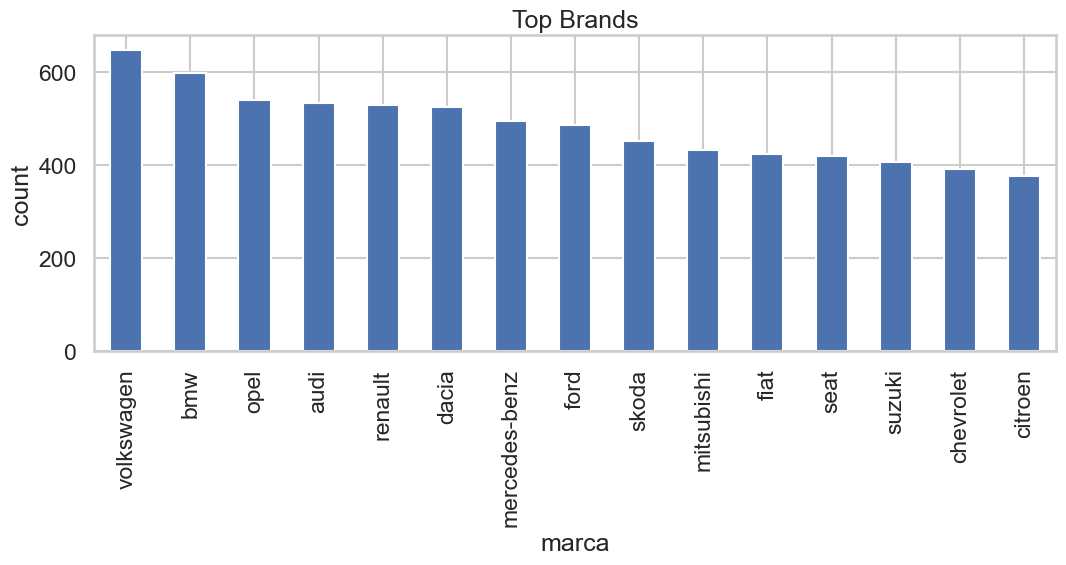

In [658]:
plt.figure(figsize=(11,6))
df_clean["marca"].value_counts().head(15).plot(kind="bar")
plt.title("Top Brands")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/brands_top.png", dpi=140)
plt.show()


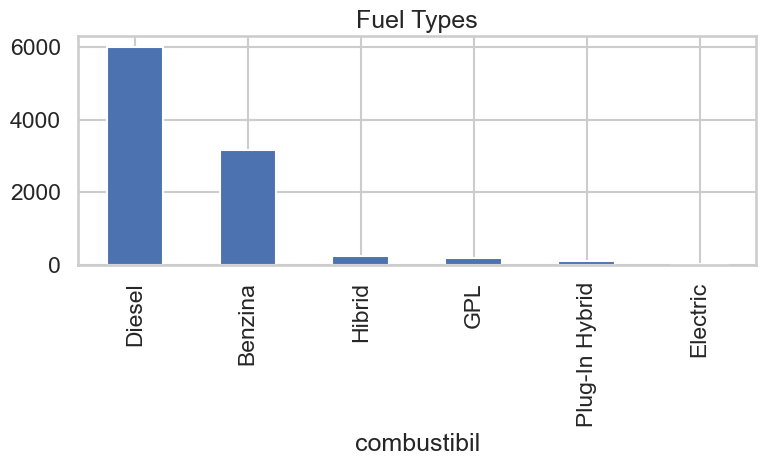

In [659]:
plt.figure(figsize=(8,5))
df_clean["combustibil"].value_counts().plot(kind="bar")
plt.title("Fuel Types")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/fuel_types.png", dpi=140)
plt.show()


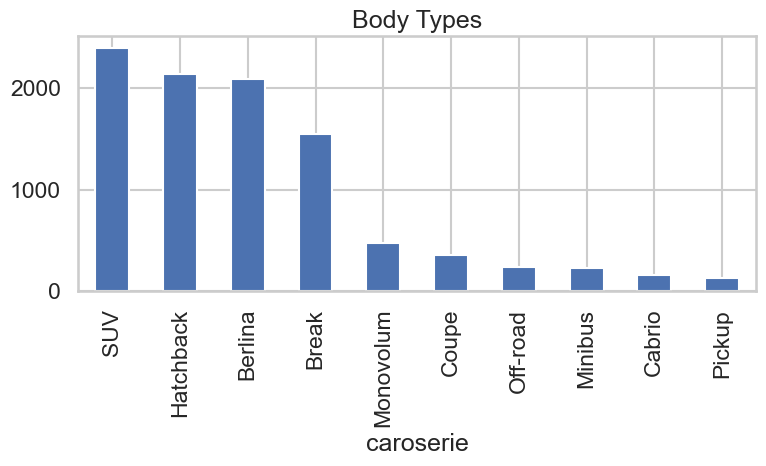

In [660]:
plt.figure(figsize=(8,5))
df_clean["caroserie"].value_counts().plot(kind="bar")
plt.title("Body Types")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/body_types.png", dpi=140)
plt.show()


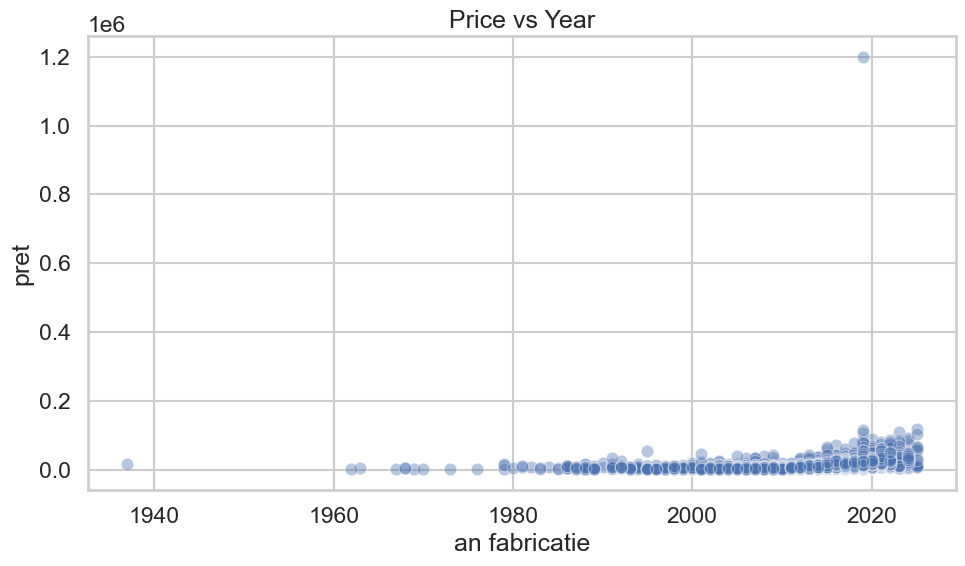

In [661]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="an fabricatie", y="pret", alpha=0.4)
plt.title("Price vs Year")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/price_vs_year.png", dpi=140)
plt.show()


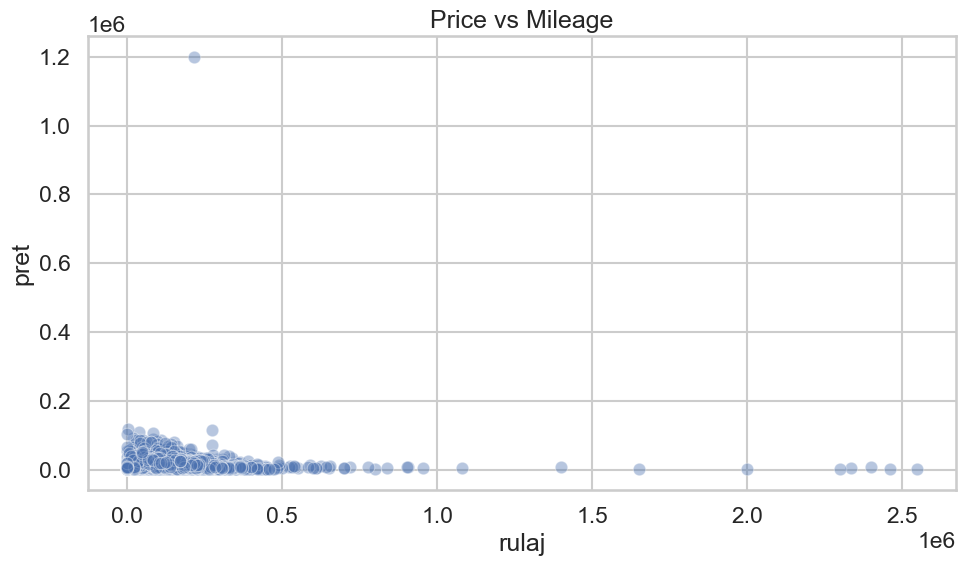

In [662]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="rulaj", y="pret", alpha=0.4)
plt.title("Price vs Mileage")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/price_vs_mileage.png", dpi=140)
plt.show()


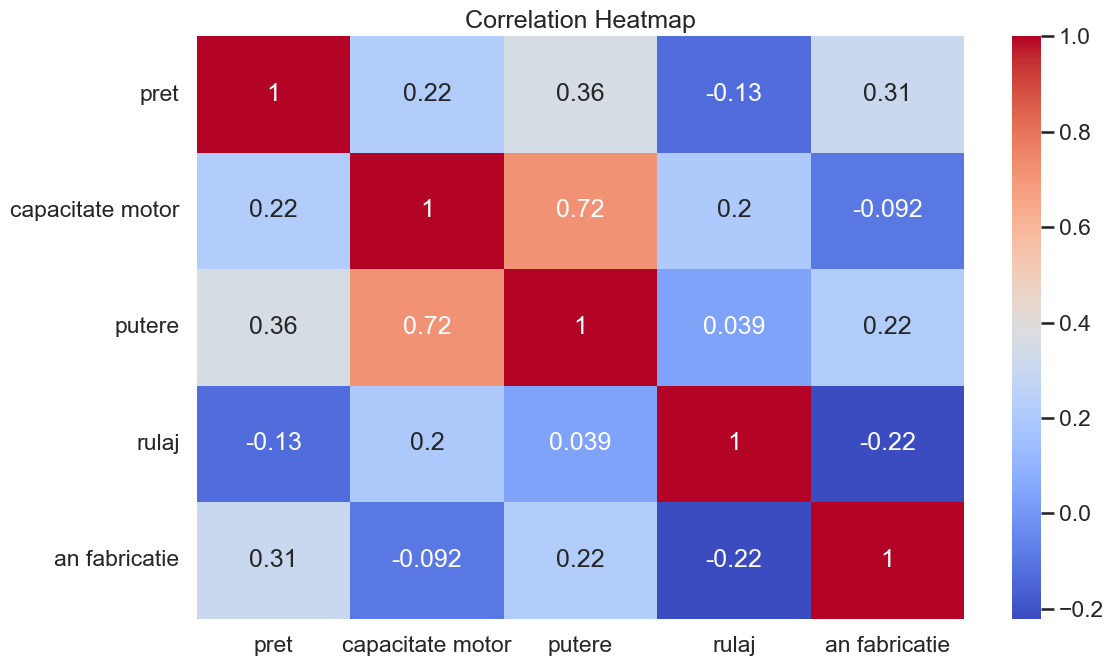

In [663]:
numeric = df_clean.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(12,7))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/correlation_heatmap.png", dpi=140)
plt.show()


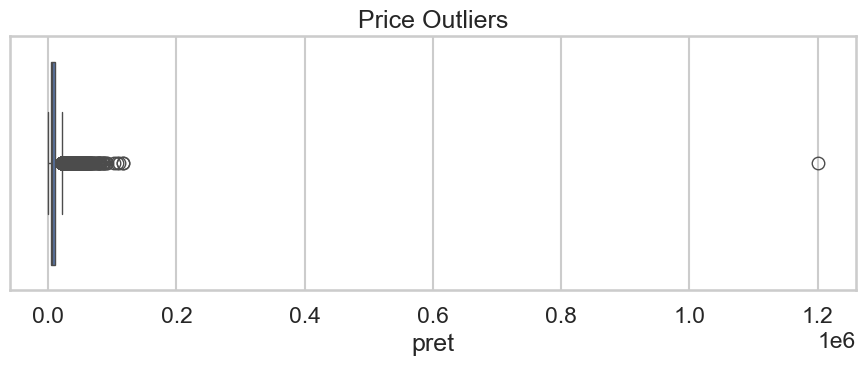

In [664]:
plt.figure(figsize=(9,4))
sns.boxplot(x=df_clean["pret"])
plt.title("Price Outliers")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/price_outliers.png", dpi=140)
plt.show()


## Step 4 - ✅ Outlier Removal Using Caped Values

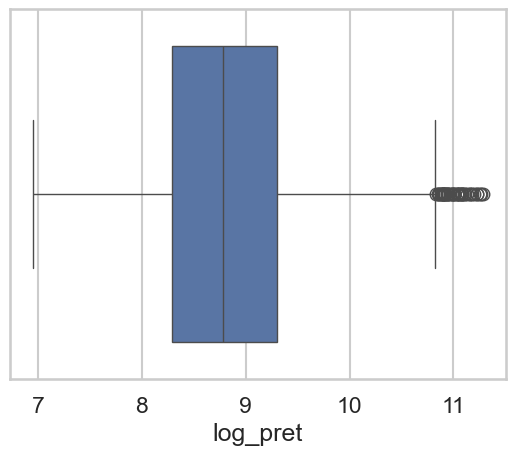

count     9584.000000
mean      8852.576064
std       7813.159027
min       1040.000000
50%       6500.000000
90%      17000.000000
95%      23000.000000
99%      42000.000000
max      79900.000000
Name: pret, dtype: float64

In [665]:
df_filtered = df_clean[
    (df_clean["pret"] < 80000) &
    (df_clean["pret"] > 1000)
]
df_filtered = df_filtered[df_filtered["rulaj"] < 600000]
df_filtered = df_filtered[
    (df_filtered["capacitate motor"] > 500) &
    (df_filtered["capacitate motor"] < 6000)
]
df_filtered = df_filtered[df_filtered["putere"] < 600]
import numpy as np
df_filtered["log_pret"] = np.log1p(df_filtered["pret"])
import seaborn as sns
sns.boxplot(x=df_filtered["log_pret"])
plt.savefig(f"{SAVE_DIR}/outlier_removal.png", dpi=140)
plt.show()
df_filtered["pret"].describe([0.9, 0.95, 0.99])


## Step 5 - Feature Engineer

In [666]:
# =====================================================
# RECOMMENDED NEW FEATURES FOR CAR PRICING MODEL
# =====================================================

import numpy as np
import pandas as pd

# Assume df_filtered is already loaded with existing features

CURRENT_YEAR = pd.Timestamp.now().year

# ============================================
# 3. Numeric engineered features
# ============================================

CURRENT_YEAR = pd.Timestamp.now().year

# Age of the car
df_filtered["age"] = CURRENT_YEAR - df_filtered["an fabricatie"]

# km driven per year (protect from division by zero)
df_filtered["km_per_year"] = (df_filtered["rulaj"] / df_filtered["age"].replace(0, 1))

# Power per liter
df_filtered["putere_per_liter"] = df_filtered["putere"] / df_filtered["capacitate motor"]

# Diesel + old flag
df_filtered["old_diesel"] = (
    (df_filtered["combustibil"].str.lower() == "diesel") &
    (df_filtered["age"] > 10)
).astype(int)

# ============================================
# 4. Brand tiers & premium classification
# ============================================

premium_brands = {
    "audi","bmw","mercedes","mercedes-benz","volvo","porsche","lexus",
    "jaguar","maserati","tesla","infiniti","land rover","range rover"
}

mid_brands = {
    "volkswagen","ford","toyota","mazda","honda","hyundai","kia",
    "renault","peugeot","citroen","skoda","seat","opel","nissan",
    "fiat","suzuki","dacia"
}

def map_brand_tier(brand: str) -> int:
    b = str(brand).lower().strip()
    if b in premium_brands:
        return 2
    elif b in mid_brands:
        return 1
    return 0

df_filtered["brand_tier"] = df_filtered["marca"].apply(map_brand_tier)
df_filtered["is_premium"] = (df_filtered["brand_tier"] == 2).astype(int)

# ============================================
# 5. Engine type features (electric, hybrid)
# ============================================

def map_engine_type(fuel: str) -> str:
    f = str(fuel).lower()
    if "electr" in f:
        return "EV"
    if "hibr" in f or "hybrid" in f:
        return "HYBRID"
    return "ICE"

df_filtered["engine_type"] = df_filtered["combustibil"].apply(map_engine_type)
df_filtered["is_electric"] = (df_filtered["engine_type"] == "EV").astype(int)
df_filtered["is_hybrid"]  = (df_filtered["engine_type"] == "HYBRID").astype(int)

# ============================================
# 6. Age category
# ============================================

def map_age_category(age):
    if age <= 5: return "new"
    elif age <= 10: return "medium"
    elif age <= 15: return "old"
    return "very_old"

df_filtered["age_category"] = df_filtered["age"].apply(map_age_category)

# ============================================
# 7. Mileage category
# ============================================

def map_rulaj_cat(km):
    if km < 100_000: return "low"
    elif km < 250_000: return "medium"
    elif km < 350_000: return "high"
    return "very_high"

df_filtered["rulaj_cat"] = df_filtered["rulaj"].apply(map_rulaj_cat)

# ============================================
# 8. Gearbox: automatic flag
# ============================================

df_filtered["is_automatic"] = df_filtered["cutie viteza"].str.contains(
    "auto", case=False, na=False
).astype(int)

# ============================================
# 9. Body type tier (SUV and performance)
# ============================================

def map_body_tier(body: str) -> int:
    b = str(body).lower()
    if any(x in b for x in ["suv", "off-road", "off road", "cabrio", "coupe"]):
        return 2  # expensive body types
    if any(x in b for x in ["berlina", "sedan", "break", "wagon"]):
        return 1  # mid segment
    return 0      # hatchback, van, util, etc.

df_filtered["body_tier"] = df_filtered["caroserie"].apply(map_body_tier)

# ============================================
# 10. Car segment (optional but recommended)
#     A/B/C/D/E/F/SUV/Van mapping
# ============================================

def map_segment(row):
    body = str(row["caroserie"]).lower()
    cc = row["capacitate motor"]
    
    if "suv" in body or "off" in body:
        return "SUV"
    if "cabrio" in body or "coupe" in body:
        return "SPORT"
    if "break" in body or "wagon" in body:
        return "D"
    if "berlina" in body or "sedan" in body:
        return "C"
    if cc <= 1200:
        return "A"
    if cc <= 1600:
        return "B"
    if cc <= 2000:
        return "C"
    if cc <= 2500:
        return "D"
    if cc > 2500:
        return "E"
    return "unknown"

df_filtered["segment"] = df_filtered.apply(map_segment, axis=1)

# ============================================
# 11. Interaction features (high-impact only)
# ============================================

# Power × Age
df_filtered["age_x_power"] = df_filtered["age"] * df_filtered["putere"]

# Premium × SUV
df_filtered["premium_x_suv"] = (
    (df_filtered["is_premium"] == 1) &
    (df_filtered["segment"] == "SUV")
).astype(int)

# Power × Engine size
df_filtered["power_x_cc"] = df_filtered["putere"] * df_filtered["capacitate motor"]

# Automatic × Premium
df_filtered["auto_x_premium"] = df_filtered["is_automatic"] * df_filtered["is_premium"]

# Age × km/year (wear intensity)
df_filtered["age_x_km_year"] = df_filtered["age"] * df_filtered["km_per_year"]

# Body tier × power (SUV high-power bonus)
df_filtered["body_x_power"] = df_filtered["body_tier"] * df_filtered["putere"]

# Age × Brand tier (premium retains value)
df_filtered["age_x_brandtier"] = df_filtered["age"] * df_filtered["brand_tier"]

print("="*70)
print("ADDING RECOMMENDED NEW FEATURES")
print("="*70)

# =====================================================
# 1) DEPRECIATION FEATURES (Age-based value loss)
# =====================================================

print("\n1. Depreciation Features...")

# Exponential depreciation (cars lose value faster when young)
df_filtered["age_decay"] = np.exp(-df_filtered["age"] / 8.0)
print("   ✓ age_decay: exponential depreciation curve")

# Age squared (captures non-linear depreciation)
df_filtered["age_squared"] = df_filtered["age"] ** 2
print("   ✓ age_squared: non-linear age effect")

# Age cubed (for very old cars depreciation plateau)
df_filtered["age_cubed"] = df_filtered["age"] ** 3
print("   ✓ age_cubed: extreme age penalty")

# =====================================================
# 2) MILEAGE EFFICIENCY FEATURES
# =====================================================

print("\n2. Mileage Efficiency Features...")

# Mileage per year (normalized by age - how much driven annually)
df_filtered["avg_km_per_year"] = (
    df_filtered["rulaj"] / (df_filtered["age"].replace(0, 1))
)
print("   ✓ avg_km_per_year: annual driving pattern")

# Mileage efficiency ratio (low = well-maintained, high = heavy use)
df_filtered["mileage_efficiency"] = (
    df_filtered["rulaj"] / (df_filtered["capacitate motor"] * (df_filtered["age"] + 1))
).round(3)
print("   ✓ mileage_efficiency: care/maintenance indicator")

# Mileage squared (captures extreme mileage penalty)
df_filtered["rulaj_squared"] = df_filtered["rulaj"] ** 2
print("   ✓ rulaj_squared: heavy mileage penalty")

# =====================================================
# 3. PERFORMANCE & ENGINE FEATURES
# =====================================================

print("\n3. Performance & Engine Features...")

# Power-to-weight proxy (power per engine size = efficiency/performance)
df_filtered["power_efficiency"] = (
    df_filtered["putere"] / (df_filtered["capacitate motor"] / 1000)
).round(2)
print("   ✓ power_efficiency: HP per liter (performance indicator)")

# Torque proxy (cubic capacity × RPM efficiency ≈ torque)
# For simplicity: bigger engines have more torque
df_filtered["torque_proxy"] = (
    df_filtered["capacitate motor"] * df_filtered["putere"] / 100
).round(0)
print("   ✓ torque_proxy: estimated torque indicator")

# Engine performance tier (normalized power per cc)
def engine_performance_tier(row):
    hp_per_cc = row["putere"] / (row["capacitate motor"] / 1000)
    if hp_per_cc >= 80:
        return 3  # High performance
    elif hp_per_cc >= 60:
        return 2  # Normal
    elif hp_per_cc >= 40:
        return 1  # Economical
    return 0      # Very economical

df_filtered["engine_perf_tier"] = df_filtered.apply(engine_performance_tier, axis=1)
print("   ✓ engine_perf_tier: performance classification")

# =====================================================
# 4. VALUE RETENTION FEATURES
# =====================================================

print("\n4. Value Retention Features...")

# Premium age multiplier (premium cars retain value better)
df_filtered["premium_age_factor"] = (
    df_filtered["is_premium"] * (1 - (df_filtered["age"] / 20))
).round(2)
print("   ✓ premium_age_factor: premium value retention")

# Luxury score (combines multiple prestige factors)
df_filtered["luxury_index"] = (
    df_filtered["brand_tier"] * 3 +
    df_filtered["is_premium"] * 2 +
    df_filtered["body_tier"] * 2 +
    (df_filtered["putere"] / 50)  # Power bonus
).round(1)
print("   ✓ luxury_index: combined luxury indicator")

# =====================================================
# 5. MARKET SEGMENT FEATURES
# =====================================================

print("\n5. Market Segment Features...")

# Segment value tier (different segments have different value curves)
segment_value = {
    "A": 0,      # Budget hatchbacks
    "B": 1,      # City cars
    "C": 2,      # Popular compact
    "D": 3,      # Mid-size sedan (popular)
    "E": 4,      # Executive/premium
    "SUV": 3,    # SUVs (high value retention)
    "SPORT": 4,  # Sports/performance
    "unknown": 2 # Default to middle
}

df_filtered["segment_value_tier"] = df_filtered["segment"].map(segment_value)
print("   ✓ segment_value_tier: market segment value")

# SUV premium (SUVs command higher prices)
df_filtered["is_suv"] = (df_filtered["segment"] == "SUV").astype(int)
df_filtered["suv_premium"] = df_filtered["is_suv"] * (
    1 + (df_filtered["putere"] / 200)
).round(2)
print("   ✓ suv_premium: SUV market premium")

# =====================================================
# 6. FUEL TYPE FEATURES
# =====================================================

print("\n6. Fuel Type Features...")

# Eco-friendly bonus (EV/Hybrid premium)
df_filtered["eco_bonus"] = (
    df_filtered["is_electric"] * 5 +
    df_filtered["is_hybrid"] * 2
).round(1)
print("   ✓ eco_bonus: green vehicle premium")

# Fuel efficiency proxy (smaller cars with less power = efficient)
df_filtered["fuel_efficiency_score"] = (
    1 / ((df_filtered["capacitate motor"] / 1000) * (df_filtered["putere"] / 100 + 1))
).round(3)
print("   ✓ fuel_efficiency_score: estimated fuel efficiency")

# =====================================================
# 7. COMBINED INTERACTION FEATURES (High Impact)
# =====================================================

print("\n7. Combined Interaction Features...")

# Age × Mileage interaction (young car with high miles = damaged)
df_filtered["age_mileage_wear"] = (
    (df_filtered["age"] / 20) * (df_filtered["rulaj"] / 300000)
).round(3)
print("   ✓ age_mileage_wear: combined age + mileage wear")

# Premium performance (premium + high power = luxury sports)
df_filtered["premium_performance"] = (
    df_filtered["is_premium"] * df_filtered["putere"]
).round(0)
print("   ✓ premium_performance: premium sports car indicator")

# Economy power (budget brand with high power = modified/special)
df_filtered["economy_power"] = (
    (1 - df_filtered["is_premium"]) * df_filtered["putere"]
).round(0)
print("   ✓ economy_power: performance in economy segment")

# Modern tech score (newer + automatic + premium = modern)
df_filtered["modern_tech_score"] = (
    ((20 - df_filtered["age"]) / 20) * df_filtered["is_automatic"] * 
    (1 + df_filtered["is_premium"])
).round(2)
print("   ✓ modern_tech_score: modernness indicator")

# =====================================================
# 8. RARITY & UNIQUENESS FEATURES
# =====================================================

print("\n8. Rarity & Uniqueness Features...")

# Brand market presence (count in dataset)
brand_counts = df_filtered["marca"].value_counts()
df_filtered["brand_market_presence"] = df_filtered["marca"].map(brand_counts)
print("   ✓ brand_market_presence: how common is brand")

# Brand exclusivity (inverse of market presence)
df_filtered["brand_exclusivity"] = (
    1 / (df_filtered["brand_market_presence"] / len(df_filtered))
).round(2)
print("   ✓ brand_exclusivity: rarity factor")

# Segment rarity (uncommon segments cost more)
segment_counts = df_filtered["segment"].value_counts()
df_filtered["segment_rarity"] = df_filtered["segment"].map(
    {seg: 1 / (count / len(df_filtered)) for seg, count in segment_counts.items()}
).round(2)
print("   ✓ segment_rarity: how common is this segment")

# =====================================================
# 9. CONDITION SCORE (Synthetic)
# =====================================================

print("\n9. Condition Score...")

# Overall condition proxy (combines age, mileage, type)
df_filtered["condition_score"] = (
    (20 - df_filtered["age"]) / 20 * 0.4 +  # Age factor (40%)
    (1 - df_filtered["rulaj"] / df_filtered["rulaj"].max()) * 0.4 +  # Mileage (40%)
    df_filtered["is_automatic"] * 0.1 +  # Modern transmission (10%)
    df_filtered["is_hybrid"] * 0.1  # Eco-friendly (10%)
).round(2)
print("   ✓ condition_score: synthetic overall condition (0-1)")

# =====================================================
# SUMMARY
# =====================================================

print("\n" + "="*70)
print("SUMMARY OF NEW FEATURES ADDED")
print("="*70)

new_features = [
    # Depreciation
    "age_decay", "age_squared", "age_cubed",
    # Mileage efficiency
    "avg_km_per_year", "mileage_efficiency", "rulaj_squared",
    # Performance
    "power_efficiency", "torque_proxy", "engine_perf_tier",
    # Value retention
    "premium_age_factor", "luxury_index",
    # Segment
    "segment_value_tier", "is_suv", "suv_premium",
    # Fuel
    "eco_bonus", "fuel_efficiency_score",
    # Interactions
    "age_mileage_wear", "premium_performance", "economy_power", "modern_tech_score",
    # Rarity
    "brand_market_presence", "brand_exclusivity", "segment_rarity",
    # Condition
    "condition_score",
]

print(f"\nTotal new features: {len(new_features)}")
print("\nNew features added:")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")

print("\n" + "="*70)
print("RECOMMENDED FEATURE SET")
print("="*70)

# Base numeric features
base_numeric = [
    "age", "rulaj", "capacitate motor", "putere",
    "brand_tier", "is_premium", "is_automatic", "body_tier",
    "is_electric", "is_hybrid"
]

# New features to add
add_features = [
    # Depreciation (pick 1-2)
    "age_decay",  # Better than age_squared for most models
    
    # Mileage (pick 1)
    "mileage_efficiency",  # Cleaner than avg_km_per_year
    
    # Performance (pick 1-2)
    "power_efficiency",
    "engine_perf_tier",
    
    # Value retention (pick 1)
    "luxury_index",
    
    # Segment (pick 1-2)
    "segment_value_tier",
    "is_suv",
    
    # Fuel (pick 1)
    "eco_bonus",
    
    # Interactions (pick best 2-3)
    "premium_performance",
    "modern_tech_score",
    
    # Condition/Rarity (pick 1-2)
    "condition_score",
    "brand_exclusivity",
]

recommended_numeric = base_numeric + add_features

print(f"\nFinal recommended numeric features ({len(recommended_numeric)}):")
for i, feat in enumerate(recommended_numeric, 1):
    print(f"  {i:2d}. {feat}")

print("\n" + "="*70)
print("✓ All new features created!")
print("="*70)

# Show sample of data with new features
print("\nSample of data with new features:")
print(df_filtered[new_features[:5]].describe())
df_filtered.sample(5)


ADDING RECOMMENDED NEW FEATURES

1. Depreciation Features...
   ✓ age_decay: exponential depreciation curve
   ✓ age_squared: non-linear age effect
   ✓ age_cubed: extreme age penalty

2. Mileage Efficiency Features...
   ✓ avg_km_per_year: annual driving pattern
   ✓ mileage_efficiency: care/maintenance indicator
   ✓ rulaj_squared: heavy mileage penalty

3. Performance & Engine Features...
   ✓ power_efficiency: HP per liter (performance indicator)
   ✓ torque_proxy: estimated torque indicator
   ✓ engine_perf_tier: performance classification

4. Value Retention Features...
   ✓ premium_age_factor: premium value retention
   ✓ luxury_index: combined luxury indicator

5. Market Segment Features...
   ✓ segment_value_tier: market segment value
   ✓ suv_premium: SUV market premium

6. Fuel Type Features...
   ✓ eco_bonus: green vehicle premium
   ✓ fuel_efficiency_score: estimated fuel efficiency

7. Combined Interaction Features...
   ✓ age_mileage_wear: combined age + mileage wear
   

,marca,model,pret,capacitate motor,putere,combustibil,caroserie,rulaj,culoare,an fabricatie,cutie viteza,log_pret,age,km_per_year,putere_per_liter,old_diesel,brand_tier,is_premium,engine_type,is_electric,is_hybrid,age_category,rulaj_cat,is_automatic,body_tier,segment,age_x_power,premium_x_suv,power_x_cc,auto_x_premium,age_x_km_year,body_x_power,age_x_brandtier,age_decay,age_squared,age_cubed,avg_km_per_year,mileage_efficiency,rulaj_squared,power_efficiency,torque_proxy,engine_perf_tier,premium_age_factor,luxury_index,segment_value_tier,is_suv,suv_premium,eco_bonus,fuel_efficiency_score,age_mileage_wear,premium_performance,economy_power,modern_tech_score,brand_market_presence,brand_exclusivity,segment_rarity,condition_score
10894,volkswagen,Passat,6250.0,2000,170,Diesel,Break,275300,Gri,2012,Manuala,8.740497,13,21176.923077,0.085000,1,1,0,ICE,0,0,old,high,0,1,D,2210,0,340000,0,275300.0,170,13,0.196912,169,2197,21176.923077,9.832,75790090000,85.00,3400.0,3,0.0,8.4,3,0,0.0,0,0.185,0.596,0,170,0.00,632,15.16,5.27,0.36
8149,peugeot,508,8890.0,1997,150,Diesel,Berlina,232000,Gri,2016,Manuala,9.092795,9,25777.777778,0.075113,0,1,0,ICE,0,0,medium,medium,0,1,C,1350,0,299550,0,232000.0,150,9,0.324652,81,729,25777.777778,11.617,53824000000,75.11,2996.0,2,0.0,8.0,2,0,0.0,0,0.200,0.348,0,150,0.00,348,27.54,3.45,0.46
10530,toyota,Prius,4900.0,1798,139,Hibrid,Berlina,375000,Alb,2011,Automata,8.497195,14,26785.714286,0.077308,0,1,0,HYBRID,0,1,old,very_high,1,1,C,1946,0,249922,0,375000.0,139,14,0.173774,196,2744,26785.714286,13.904,140625000000,77.31,2499.0,2,0.0,7.8,2,0,0.0,2,0.233,0.875,0,139,0.30,293,32.71,3.45,0.47
4608,hyundai,Ioniq,16099.0,1580,104,Hibrid,Berlina,60600,Gri,2018,Automata,9.686575,7,8657.142857,0.065823,0,1,0,HYBRID,0,1,medium,low,1,1,C,728,0,164320,0,60600.0,104,7,0.416862,49,343,8657.142857,4.794,3672360000,65.82,1643.0,2,0.0,7.1,2,0,0.0,2,0.310,0.071,0,104,0.65,286,33.51,3.45,0.82
10973,volkswagen,Tiguan,10890.0,1995,140,Diesel,SUV,187280,Gri,2013,Automata,9.295692,12,15606.666667,0.070175,1,1,0,ICE,0,0,old,medium,1,2,SUV,1680,0,279300,0,187280.0,280,12,0.223130,144,1728,15606.666667,7.221,35073798400,70.18,2793.0,2,0.0,9.8,3,1,1.7,0,0.209,0.375,0,140,0.40,632,15.16,3.66,0.53


## 📊 Step 6 — Exploratory Data Analysis After Feature Engineering

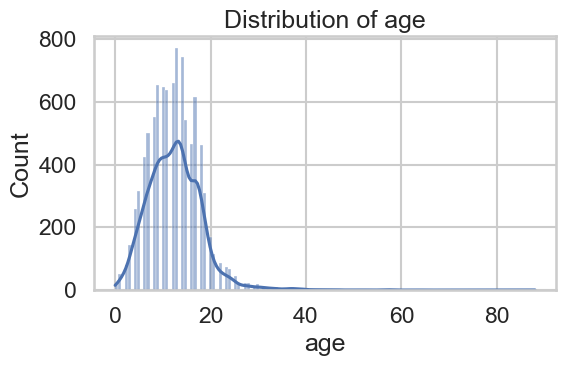

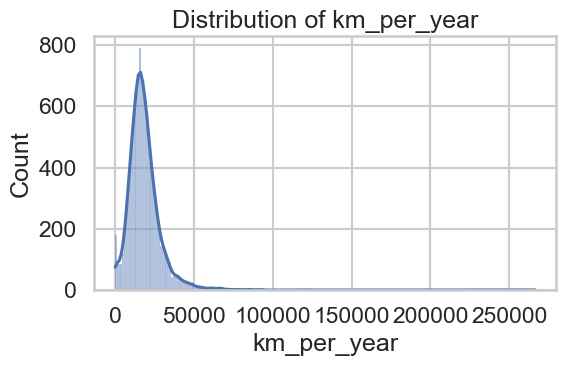

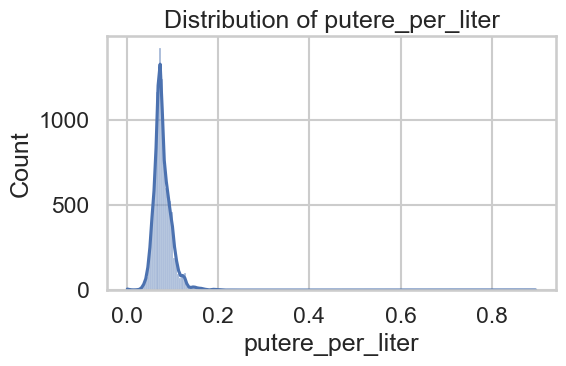

In [667]:
import matplotlib.pyplot as plt
import seaborn as sns

new_numeric = ["age", "km_per_year", "putere_per_liter"]

for col in new_numeric:
    plt.figure(figsize=(6,4))
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


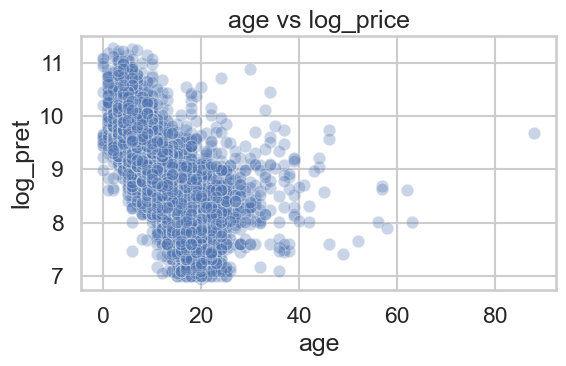

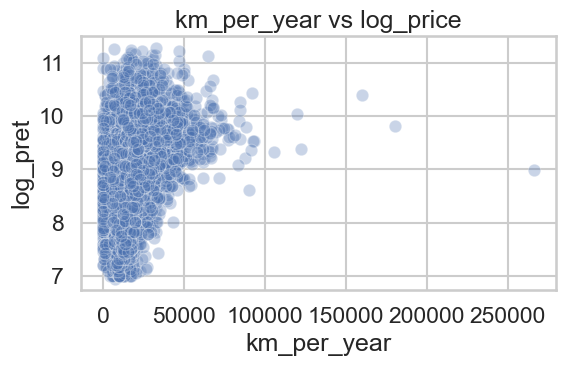

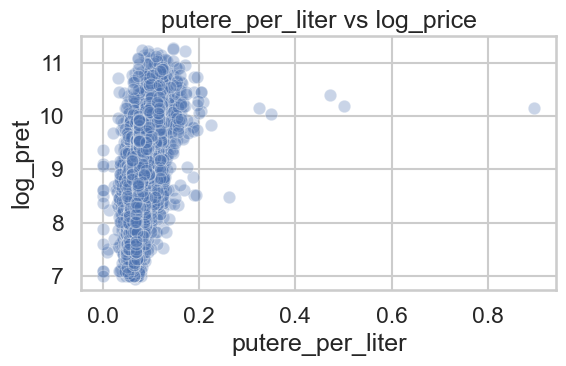

In [668]:
for col in new_numeric:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_filtered, x=col, y="log_pret", alpha=0.3)
    plt.title(f"{col} vs log_price")
    plt.tight_layout()
    plt.show()


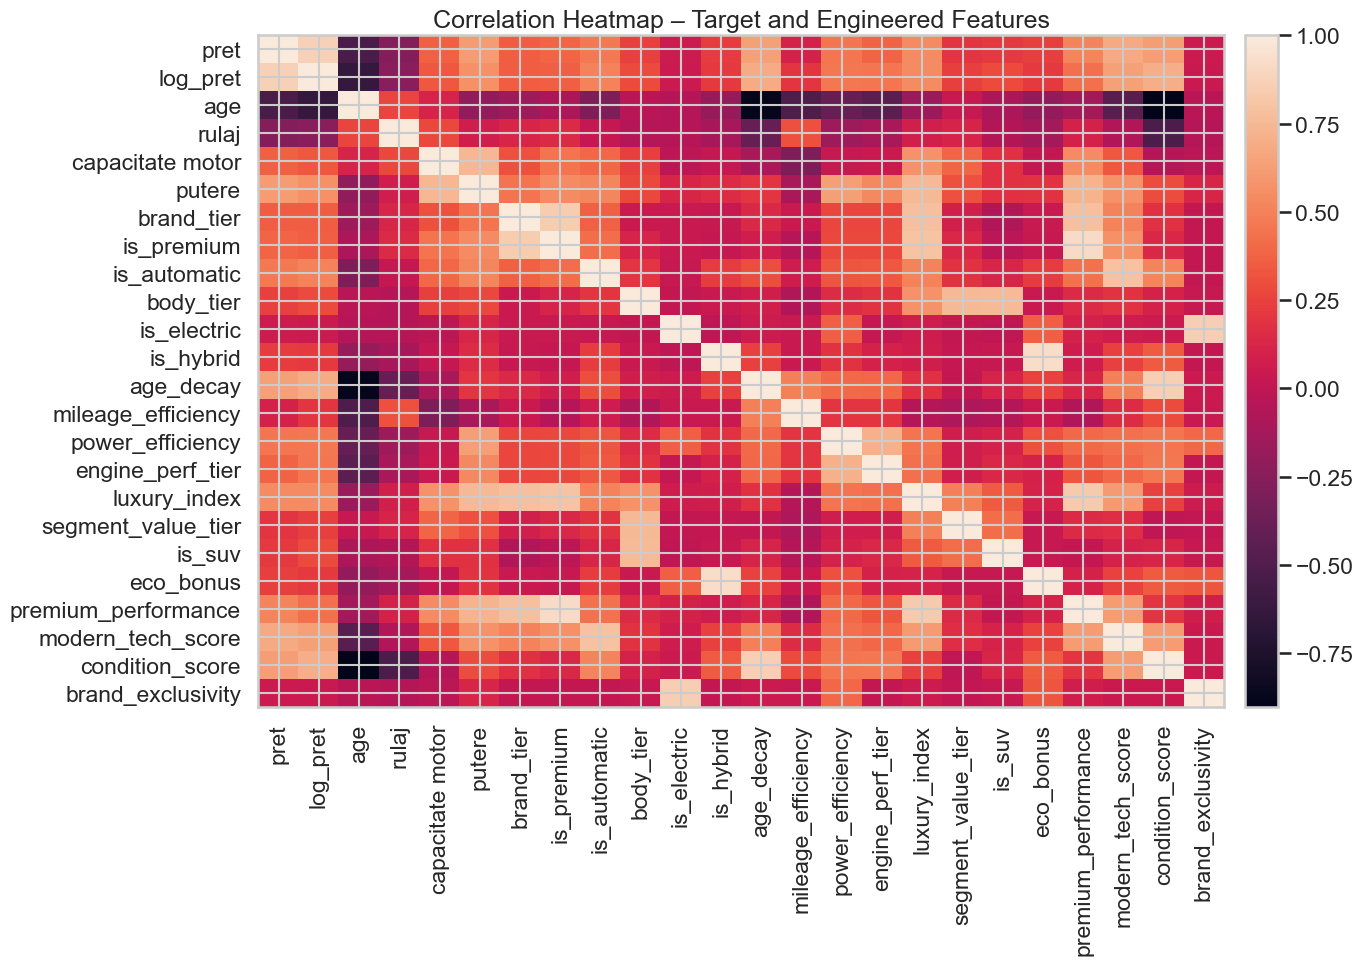

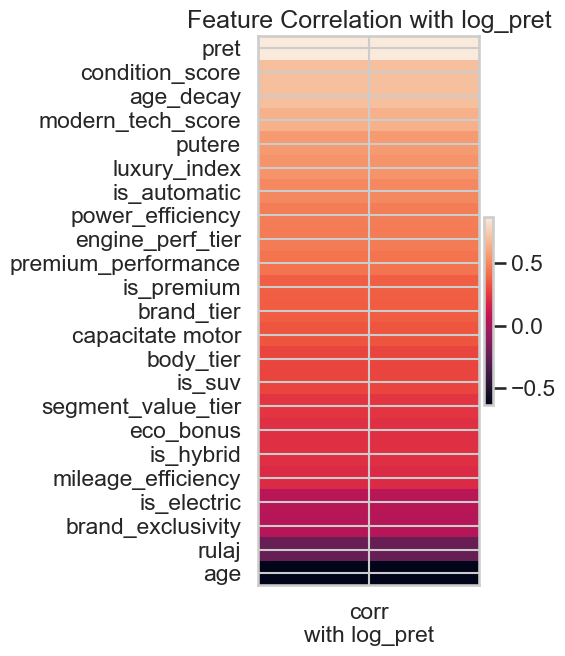


Correlation with log_pret (sorted):
pret                   0.870
condition_score        0.698
age_decay              0.695
modern_tech_score      0.642
putere                 0.563
luxury_index           0.540
is_automatic           0.506
power_efficiency       0.464
engine_perf_tier       0.456
premium_performance    0.435
is_premium             0.366
brand_tier             0.360
capacitate motor       0.337
body_tier              0.286
is_suv                 0.285
segment_value_tier     0.239
eco_bonus              0.217
is_hybrid              0.213
mileage_efficiency     0.200
is_electric            0.051
brand_exclusivity      0.041
rulaj                 -0.235
age                   -0.633
Name: log_pret, dtype: float64


In [669]:
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 1) PICK FEATURES FOR HEATMAP
# ================================

# Target(s)
target_cols = ["pret", "log_pret"]

# If you still have these defined from earlier:
base_numeric = [
    "age", "rulaj", "capacitate motor", "putere",
    "brand_tier", "is_premium", "is_automatic", "body_tier",
    "is_electric", "is_hybrid"
]

add_features = [
    "age_decay",
    "mileage_efficiency",
    "power_efficiency",
    "engine_perf_tier",
    "luxury_index",
    "segment_value_tier",
    "is_suv",
    "eco_bonus",
    "premium_performance",
    "modern_tech_score",
    "condition_score",
    "brand_exclusivity",
]

recommended_numeric = base_numeric + add_features

# Keep only columns that actually exist and are numeric
candidate_cols = target_cols + recommended_numeric
numeric_cols = [
    c for c in candidate_cols
    if c in df_filtered.columns and np.issubdtype(df_filtered[c].dtype, np.number)
]

corr = df_filtered[numeric_cols].corr()

# ================================
# 2) FULL CORRELATION HEATMAP
# ================================

plt.figure(figsize=(14, 10))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.04, pad=0.02)

plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)

plt.title("Correlation Heatmap – Target and Engineered Features")
plt.tight_layout()
plt.show()

# ================================
# 3) CORR WITH log_pret ONLY
# ================================

if "log_pret" in corr.index:
    corr_target = corr["log_pret"].drop(labels=["log_pret"], errors="ignore")
    corr_target = corr_target.sort_values(ascending=False)

    plt.figure(figsize=(6, max(4, len(corr_target) * 0.3)))
    im2 = plt.imshow(corr_target.values.reshape(-1, 1), aspect='auto')
    plt.colorbar(im2, fraction=0.04, pad=0.02)

    plt.yticks(range(len(corr_target)), corr_target.index)
    plt.xticks([0], ["corr\nwith log_pret"])

    plt.title("Feature Correlation with log_pret")
    plt.tight_layout()
    plt.show()

    # Optional: print numeric values
    print("\nCorrelation with log_pret (sorted):")
    print(corr_target.round(3))
else:
    print("log_pret not found in correlation matrix.")


## 📘 Step 7 — Train/Test Split & Model Training Using Pipelines

After cleaning the dataset and engineering new features, we prepare the data for training by splitting into train/test sets and building a preprocessing + model pipeline. This ensures consistent transformations and easy deployment later.

In [670]:
# =====================================================
# RANDOMIZED SEARCH - FAST HYPERPARAMETER TUNING
# =====================================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import joblib
import json
import time
import os
from datetime import datetime

# =====================================================
# 1) SETUP DATA
# =====================================================

df = df_filtered.copy()

numeric_features = [
    "condition_score",
    "modern_tech_score",
    "age_squared",
    "age",
    "age_cubed",
    "luxury_index",
    "fuel_efficiency_score",
    "power_x_cc",
    "torque_proxy",
    "body_x_power",
    "putere",
    "age_mileage_wear",
    "capacitate motor",
    "age_decay",
    "an fabricatie",
    "mileage_efficiency",
    "age_x_power",
    "premium_age_factor",
    "economy_power",
    "putere_per_liter",
]


categorical_features = [
    "marca",
    "model",
    "combustibil",
    "caroserie",
    "culoare",
    "cutie viteza",
    "segment",
    "engine_type",
    "age_category",
    "rulaj_cat"
]

target_col = "pret"

# Clean data
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=numeric_features + categorical_features + [target_col])

X = df[numeric_features + categorical_features]
y_eur = df[target_col].astype(float)
y = np.log1p(y_eur)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("="*70)
print("DATA LOADED")
print("="*70)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features: {X_train.shape[1]} (numeric: {len(numeric_features)}, categorical: {len(categorical_features)})")

# =====================================================
# 2) PREPROCESSING PIPELINE
# =====================================================

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# =====================================================
# 3) BUILD PIPELINE
# =====================================================

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_jobs=-1, random_state=42)),
    ]
)

# =====================================================
# 4) RANDOMIZED SEARCH (CENTERED AROUND PREVIOUS BEST)
# =====================================================

from sklearn.model_selection import RandomizedSearchCV

# Focused but richer search space
param_dist = {
        # trees: keep around the good 600, but allow a bit smaller
    "model__n_estimators": [500,600],

    # depth: moderately deep + no limit
    "model__max_depth": [20, None],

    # min samples split: slightly regularizing around 8
    "model__min_samples_split": [4, 8],

    # leaf size: very small, but try 1 and 2
    "model__min_samples_leaf": [1],

    # max_features: fix near your best region to reduce search
    "model__max_features": [0.5],

    # bootstrap: fix to True (best from previous run)
    "model__bootstrap": [True],
}

N_ITER = 30   # number of random combinations to test
CV_FOLDS = 3  # 3-fold CV to keep time reasonable

print("\n" + "="*70)
print("RANDOMIZED SEARCH - IMPROVED TUNING")
print("="*70)
print(f"Testing {N_ITER} random parameter combinations...")
print(f"Cross-validation: {CV_FOLDS}-fold")
print("Scoring metric: Negative MAE (log-price)\n")

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=N_ITER,
    cv=CV_FOLDS,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    verbose=1,
)

start = time.time()
random_search.fit(X_train, y_train)
elapsed = time.time() - start

print(f"\n✓ RandomizedSearch completed in {elapsed/60:.1f} minutes")

# =====================================================
# 5) BEST PARAMETERS
# =====================================================

print("\n" + "="*70)
print("BEST PARAMETERS FOUND")
print("="*70)

best_final = random_search.best_estimator_
best_params_final = random_search.best_params_
best_score = -random_search.best_score_

for key, value in best_params_final.items():
    param_name = key.replace("model__", "")
    print(f"{param_name:25s}: {value}")

print(f"\nBest CV MAE (log-scale): {best_score:.4f}")

# =====================================================
# 6) EVALUATION ON TEST SET
# =====================================================

print("\n" + "="*70)
print("TEST SET EVALUATION")
print("="*70)

y_pred_log = best_final.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100
accuracy = 100 - mape

print(f"\nMetrics:")
print(f"  MAE       : €{mae:,.2f}")
print(f"  MAPE      : {mape:.2f}%")
print(f"  R²        : {r2:.4f}")
print(f"  Accuracy  : {accuracy:.2f}%")

# =====================================================
# 7) FEATURE IMPORTANCE
# =====================================================

print("\n" + "="*70)
print("TOP 15 FEATURE IMPORTANCES")
print("="*70)

rf = best_final.named_steps["model"]
ohe = best_final.named_steps["preprocessor"].named_transformers_["cat"]

cat_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + cat_names

importances = rf.feature_importances_
feat_imp = sorted(zip(all_feature_names, importances), key=lambda x: x[1], reverse=True)

print("\n" + f"{'Rank':<5} {'Feature Name':<40} {'Importance':<10}")
print("-" * 55)
for i, (name, score) in enumerate(feat_imp[:15], 1):
    print(f"{i:<5} {name:<40} {score:.4f}")

# =====================================================
# 8) SAVE TUNED MODEL
# =====================================================

print("\n" + "="*70)
print("SAVING TUNED MODEL")
print("="*70)

os.makedirs("backend/models_storage/metadata", exist_ok=True)
model_path = "backend/models_storage/best_model_tuned.pkl"

joblib.dump(best_final, model_path)
model_size = os.path.getsize(model_path) / 1024 / 1024

print(f"\n✓ Model saved")
print(f"  Path: {model_path}")
print(f"  Size: {model_size:.2f} MB")

# =====================================================
# 9) SAVE METADATA
# =====================================================

print(f"\nSaving metadata...")

metadata = {
    "saved_at": datetime.now().isoformat(),
    "tuning_method": "RandomizedSearchCV (50 iterations)",
    "cv_folds": 5,
    "best_parameters": {k: (v.tolist() if isinstance(v, np.ndarray) else v) for k, v in best_params_final.items()},
    "performance_metrics": {
        "mae_euros": float(mae),
        "mape_percent": float(mape),
        "r2_score": float(r2),
        "accuracy_percent": float(accuracy),
        "cv_mae_log": float(best_score),
    },
    "training_info": {
        "train_samples": int(len(X_train)),
        "test_samples": int(len(X_test)),
        "total_features": len(numeric_features) + len(categorical_features),
    },
    "top_features": [
        {"rank": i, "name": name, "importance": float(score)} 
        for i, (name, score) in enumerate(feat_imp[:15], 1)
    ],
}

metadata_path = "backend/models_storage/metadata/tuned_model_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)

print(f"  Metadata: {metadata_path}")

# =====================================================
# 10) SUMMARY
# =====================================================

print("\n" + "="*70)
print("✓ TUNING COMPLETE - BEST MODEL SAVED!")
print("="*70)

print(f"""
Summary:
  ✓ Tested 50 random parameter combinations
  ✓ Best model selected via 5-fold cross-validation
  ✓ Final MAE on test set: €{mae:,.2f}
  ✓ Final R² on test set: {r2:.4f}
  ✓ Model saved to: backend/models_storage/best_model_tuned.pkl

Next steps:
  1. Load the tuned model:
     >>> import joblib
     >>> model = joblib.load('backend/models_storage/best_model_tuned.pkl')
  
  2. Make predictions:
     >>> predictions = model.predict(X_test)
  
  3. Deploy to production:
     Replace your API model path with the tuned model
""")

DATA LOADED
Training set: (7117, 30)
Test set: (1780, 30)
Features: 30 (numeric: 20, categorical: 10)

RANDOMIZED SEARCH - IMPROVED TUNING
Testing 30 random parameter combinations...
Cross-validation: 3-fold
Scoring metric: Negative MAE (log-price)

Fitting 3 folds for each of 8 candidates, totalling 24 fits

✓ RandomizedSearch completed in 13.4 minutes

BEST PARAMETERS FOUND
n_estimators             : 600
min_samples_split        : 4
min_samples_leaf         : 1
max_features             : 0.5
max_depth                : 20
bootstrap                : True

Best CV MAE (log-scale): 0.2261

TEST SET EVALUATION

Metrics:
  MAE       : €1,787.29
  MAPE      : 23.43%
  R²        : 0.8031
  Accuracy  : 76.57%

TOP 15 FEATURE IMPORTANCES

Rank  Feature Name                             Importance
-------------------------------------------------------
1     condition_score                          0.2218
2     age_squared                              0.0847
3     age_cubed                      

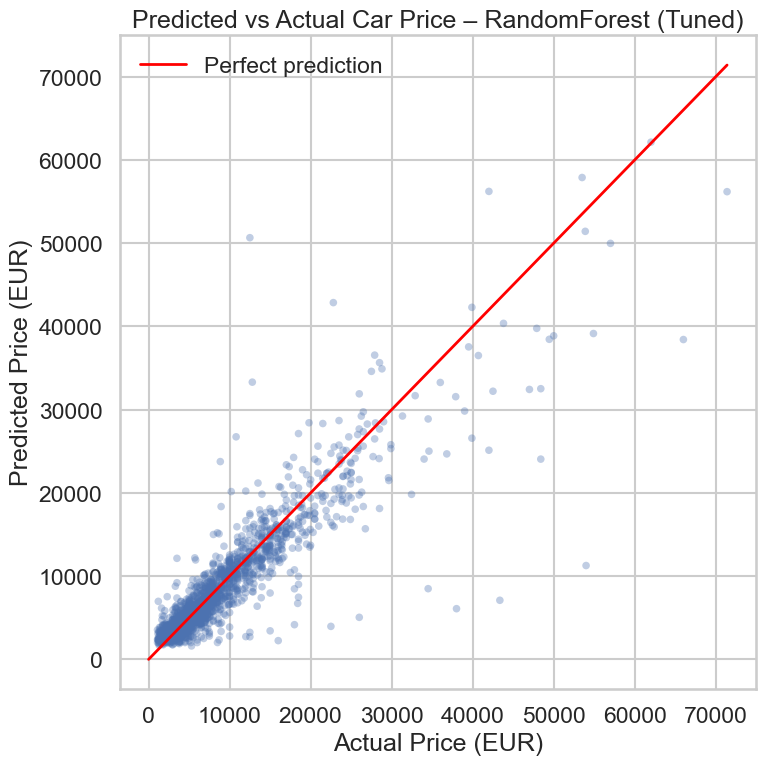

In [671]:
import os
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# RECOMPUTE TRUE & PREDICTED PRICES (EUR)
# =====================================================
y_true = np.expm1(y_test)  # actual prices in EUR
y_pred_log = best_final.predict(X_test)
y_pred = np.expm1(y_pred_log)  # predicted prices in EUR

# =====================================================
# OUTPUT FOLDER
# =====================================================
os.makedirs("plots", exist_ok=True)

# =====================================================
# PLOT
# =====================================================
plt.figure(figsize=(8, 8))

plt.scatter(
    y_true,
    y_pred,
    alpha=0.35,
    s=30,
    edgecolors="none",
)

# Diagonal reference (perfect predictions)
min_p = 0
max_p = max(y_true.max(), y_pred.max())

plt.plot(
    [min_p, max_p],
    [min_p, max_p],
    color="red",
    linewidth=2,
    label="Perfect prediction",
)

plt.xlabel("Actual Price (EUR)")
plt.ylabel("Predicted Price (EUR)")
plt.title("Predicted vs Actual Car Price – RandomForest (Tuned)")

plt.legend()
plt.tight_layout()

plt.savefig("plots/rf_actual_vs_pred.png", dpi=180)
plt.show()


In [672]:
print(feat_imp)

[('condition_score', np.float64(0.22180744953355203)), ('age_squared', np.float64(0.08473947832955794)), ('age_cubed', np.float64(0.08137871950747522)), ('age', np.float64(0.07804887285215024)), ('modern_tech_score', np.float64(0.06536956647326869)), ('power_x_cc', np.float64(0.043310037159003514)), ('torque_proxy', np.float64(0.04157106696779055)), ('putere', np.float64(0.040599843147433506)), ('luxury_index', np.float64(0.03788845988190496)), ('age_decay', np.float64(0.03534436496169645)), ('an fabricatie', np.float64(0.034703242175238944)), ('fuel_efficiency_score', np.float64(0.03043671713983887)), ('body_x_power', np.float64(0.0212051876813215)), ('age_mileage_wear', np.float64(0.02077612782641423)), ('mileage_efficiency', np.float64(0.016581111138225545)), ('capacitate motor', np.float64(0.015813962595405046)), ('putere_per_liter', np.float64(0.012023104315682778)), ('age_x_power', np.float64(0.0103269614622891)), ('premium_age_factor', np.float64(0.010268624450343083)), ('econom

In [673]:
# =====================================================
# HISTGRADIENTBOOSTINGREGRESSOR – TRAINING & TUNING
# =====================================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import joblib
import json
import time
import os
from datetime import datetime

# =====================================================
# 1) SETUP DATA (same features as your tuned RF)
# =====================================================

df = df_filtered.copy()

numeric_features = [
    "condition_score",
    "modern_tech_score",
    "age_squared",
    "age",
    "age_cubed",
    "luxury_index",
    "fuel_efficiency_score",
    "power_x_cc",
    "torque_proxy",
    "body_x_power",
    "putere",
    "age_mileage_wear",
    "capacitate motor",
    "age_decay",
    "an fabricatie",
    "mileage_efficiency",
    "age_x_power",
    "premium_age_factor",
    "economy_power",
    "putere_per_liter",
]

categorical_features = [
    "marca",
    "model",
    "combustibil",
    "caroserie",
    "culoare",
    "cutie viteza",
    "segment",
    "engine_type",
    "age_category",
    "rulaj_cat",
]

target_col = "pret"

# remove inf / nan
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=numeric_features + categorical_features + [target_col])

X = df[numeric_features + categorical_features]
y_eur = df[target_col].astype(float)
y = np.log1p(y_eur)   # log-price target, same as RF

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("="*70)
print("DATA LOADED")
print("="*70)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features: {X_train.shape[1]} (numeric: {len(numeric_features)}, categorical: {len(categorical_features)})")

# =====================================================
# 2) PREPROCESSING + PIPELINE
# =====================================================

numeric_transformer = Pipeline([("scaler", StandardScaler())])

# IMPORTANT: dense output for HistGBR (it doesn't like sparse matrices)
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

hgb = HistGradientBoostingRegressor(
    loss="squared_error",        # standard regression
    random_state=42
)

pipeline_hgb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", hgb),
    ]
)

# =====================================================
# 3) RANDOMIZED SEARCH (LIGHT TUNING)
# =====================================================

param_dist = {
    "model__learning_rate": [0.10,0.13],
    "model__max_depth": [10,12],
    "model__max_leaf_nodes": [30],
    "model__min_samples_leaf": [10, 20],
    "model__l2_regularization": [0.8,1.2],
}

N_ITER = 30
CV_FOLDS = 3

print("\n" + "="*70)
print("HISTGRADIENTBOOSTING – RANDOMIZED SEARCH")
print("="*70)
print(f"Testing {N_ITER} random parameter combinations...")
print(f"Cross-validation: {CV_FOLDS}-fold")
print("Scoring metric: Negative MAE (log-price)\n")

random_search_hgb = RandomizedSearchCV(
    estimator=pipeline_hgb,
    param_distributions=param_dist,
    n_iter=N_ITER,
    cv=CV_FOLDS,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42,
    verbose=1,
)

start = time.time()
random_search_hgb.fit(X_train, y_train)
elapsed = time.time() - start

print(f"\n✓ RandomizedSearch (HistGBR) completed in {elapsed/60:.1f} minutes")

# =====================================================
# 4) BEST PARAMETERS + TEST METRICS
# =====================================================

print("\n" + "="*70)
print("BEST PARAMETERS FOUND (HistGBR)")
print("="*70)

best_hgb = random_search_hgb.best_estimator_
best_params_hgb = random_search_hgb.best_params_
best_score_hgb = -random_search_hgb.best_score_

for key, value in best_params_hgb.items():
    print(f"{key.replace('model__',''):25s}: {value}")

print(f"\nBest CV MAE (log-scale): {best_score_hgb:.4f}")

print("\n" + "="*70)
print("TEST SET EVALUATION (HistGBR)")
print("="*70)

y_pred_log_hgb = best_hgb.predict(X_test)
y_pred_hgb = np.expm1(y_pred_log_hgb)
y_true = np.expm1(y_test)

mae_hgb = mean_absolute_error(y_true, y_pred_hgb)
r2_hgb = r2_score(y_true, y_pred_hgb)
mape_hgb = mean_absolute_percentage_error(y_true, y_pred_hgb) * 100
accuracy_hgb = 100 - mape_hgb

print(f"\nMetrics:")
print(f"  MAE       : €{mae_hgb:,.2f}")
print(f"  MAPE      : {mape_hgb:.2f}%")
print(f"  R²        : {r2_hgb:.4f}")
print(f"  Accuracy  : {accuracy_hgb:.2f}%")

# =====================================================
# 5) SAVE MODEL + METADATA
# =====================================================

print("\n" + "="*70)
print("SAVING HistGBR MODEL")
print("="*70)

os.makedirs("backend/models_storage/metadata", exist_ok=True)
model_path_hgb = "backend/models_storage/best_model_histgbr.pkl"

joblib.dump(best_hgb, model_path_hgb)
model_size_hgb = os.path.getsize(model_path_hgb) / 1024 / 1024

print(f"\n✓ HistGBR model saved")
print(f"  Path: {model_path_hgb}")
print(f"  Size: {model_size_hgb:.2f} MB")

metadata_hgb = {
    "saved_at": datetime.now().isoformat(),
    "model_type": "HistGradientBoostingRegressor",
    "tuning_method": f"RandomizedSearchCV ({N_ITER} iterations)",
    "cv_folds": CV_FOLDS,
    "best_parameters": {k: (v.tolist() if hasattr(v, 'tolist') else v) 
                        for k, v in best_params_hgb.items()},
    "performance_metrics": {
        "mae_euros": float(mae_hgb),
        "mape_percent": float(mape_hgb),
        "r2_score": float(r2_hgb),
        "accuracy_percent": float(accuracy_hgb),
        "cv_mae_log": float(best_score_hgb),
    },
    "training_info": {
        "train_samples": int(len(X_train)),
        "test_samples": int(len(X_test)),
        "total_features": len(numeric_features) + len(categorical_features),
    },
}

metadata_path_hgb = "backend/models_storage/metadata/histgbr_model_metadata.json"
with open(metadata_path_hgb, "w") as f:
    json.dump(metadata_hgb, f, indent=2)

print(f"  Metadata: {metadata_path_hgb}")

print("\n" + "="*70)
print("✓ HistGBR TRAINING + TUNING COMPLETE")
print("="*70)

DATA LOADED
Training set: (7117, 30)
Test set: (1780, 30)
Features: 30 (numeric: 20, categorical: 10)

HISTGRADIENTBOOSTING – RANDOMIZED SEARCH
Testing 30 random parameter combinations...
Cross-validation: 3-fold
Scoring metric: Negative MAE (log-price)

Fitting 3 folds for each of 16 candidates, totalling 48 fits

✓ RandomizedSearch (HistGBR) completed in 2.1 minutes

BEST PARAMETERS FOUND (HistGBR)
min_samples_leaf         : 10
max_leaf_nodes           : 30
max_depth                : 10
learning_rate            : 0.1
l2_regularization        : 0.8

Best CV MAE (log-scale): 0.2192

TEST SET EVALUATION (HistGBR)

Metrics:
  MAE       : €1,746.84
  MAPE      : 22.45%
  R²        : 0.8108
  Accuracy  : 77.55%

SAVING HistGBR MODEL

✓ HistGBR model saved
  Path: backend/models_storage/best_model_histgbr.pkl
  Size: 0.40 MB
  Metadata: backend/models_storage/metadata/histgbr_model_metadata.json

✓ HistGBR TRAINING + TUNING COMPLETE


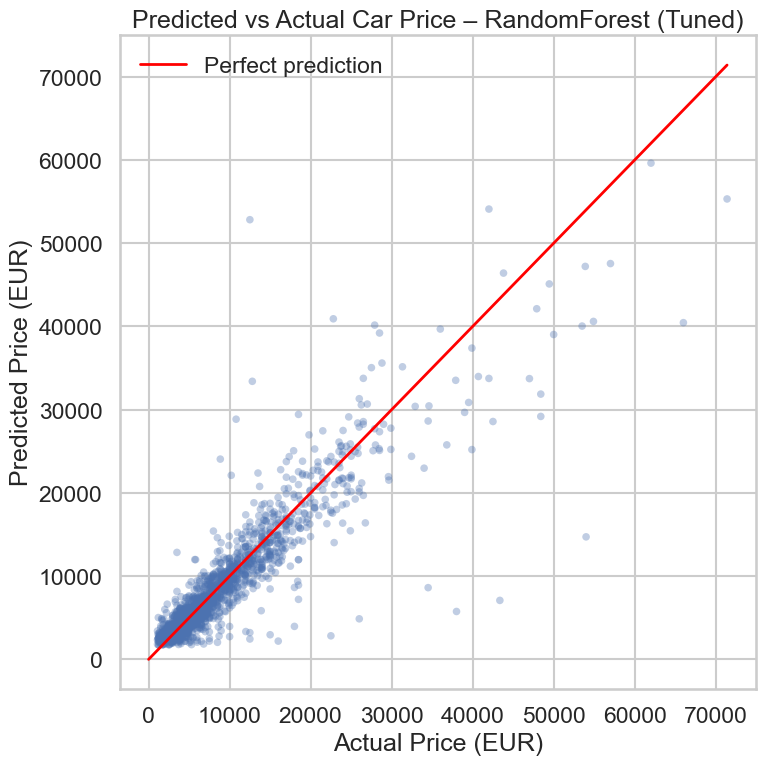

In [674]:
import os
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# RECOMPUTE TRUE & PREDICTED PRICES (EUR)
# =====================================================
y_true = np.expm1(y_test)  # actual prices in EUR
y_pred_log = best_hgb.predict(X_test)
y_pred = np.expm1(y_pred_log)  # predicted prices in EUR

# =====================================================
# OUTPUT FOLDER
# =====================================================
os.makedirs("plots", exist_ok=True)

# =====================================================
# PLOT
# =====================================================
plt.figure(figsize=(8, 8))

plt.scatter(
    y_true,
    y_pred,
    alpha=0.35,
    s=30,
    edgecolors="none",
)

# Diagonal reference (perfect predictions)
min_p = 0
max_p = max(y_true.max(), y_pred.max())

plt.plot(
    [min_p, max_p],
    [min_p, max_p],
    color="red",
    linewidth=2,
    label="Perfect prediction",
)

plt.xlabel("Actual Price (EUR)")
plt.ylabel("Predicted Price (EUR)")
plt.title("Predicted vs Actual Car Price – RandomForest (Tuned)")

plt.legend()
plt.tight_layout()

plt.savefig("plots/rf_actual_vs_pred.png", dpi=180)
plt.show()


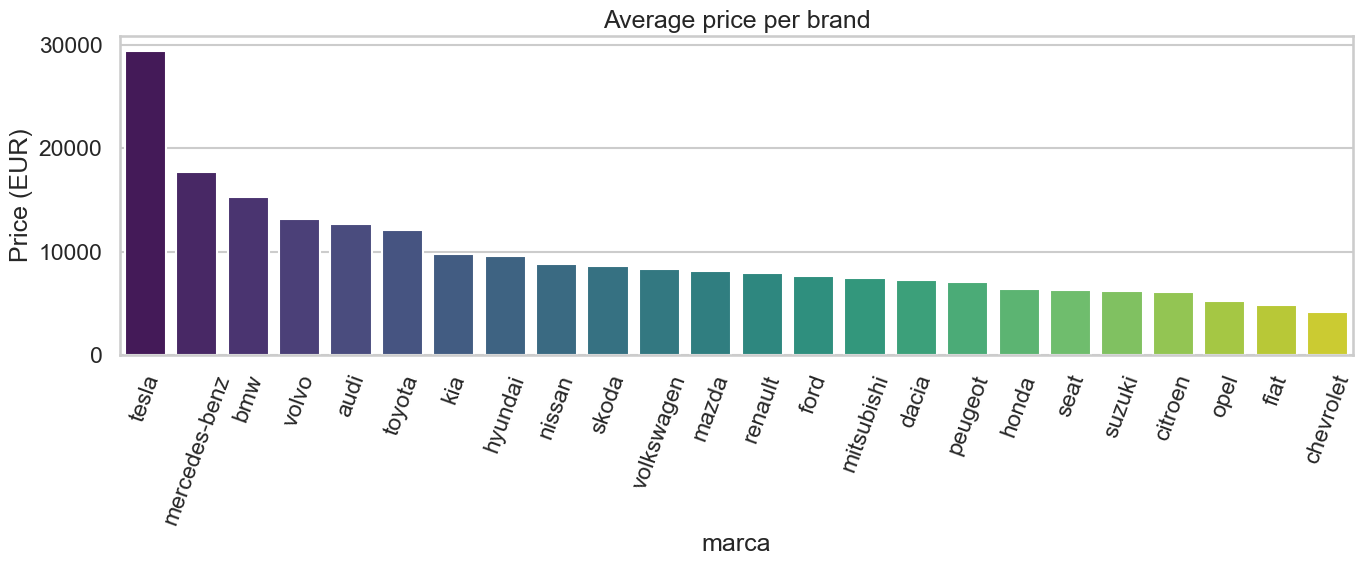

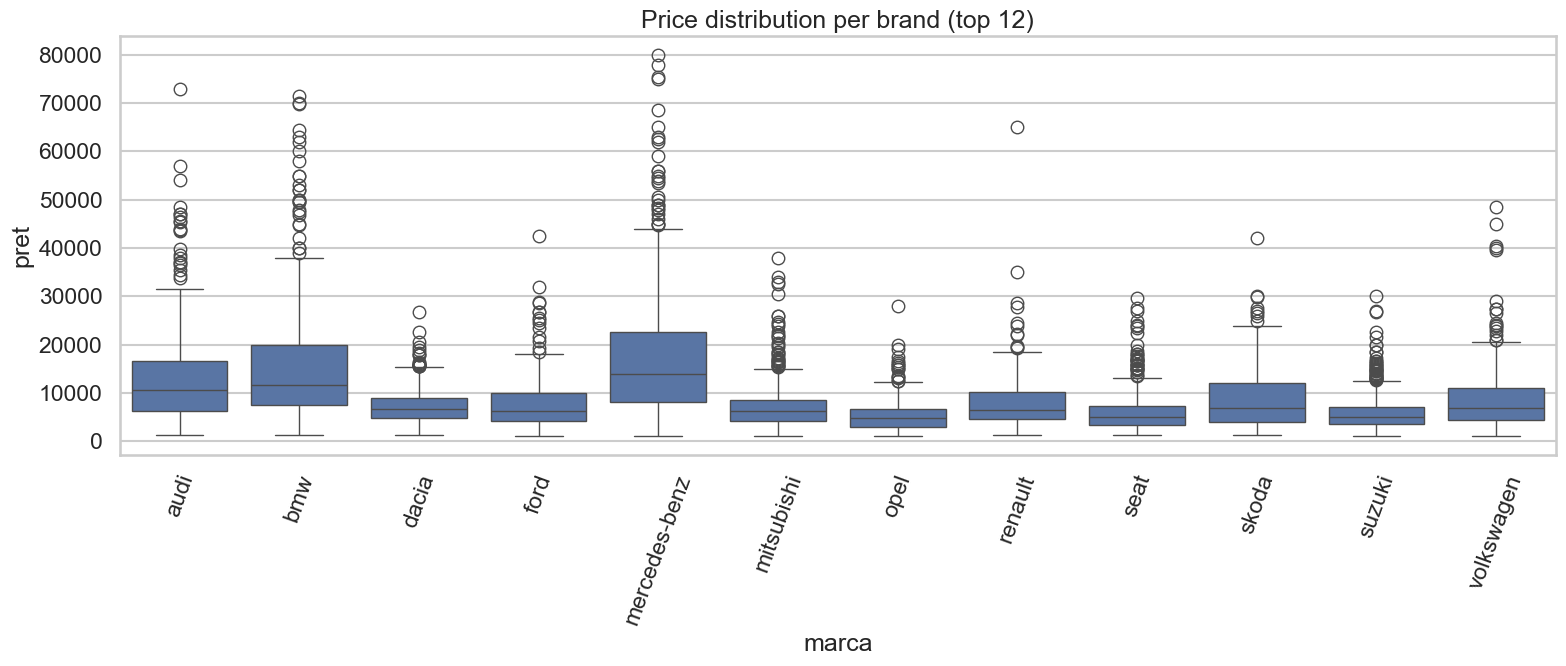

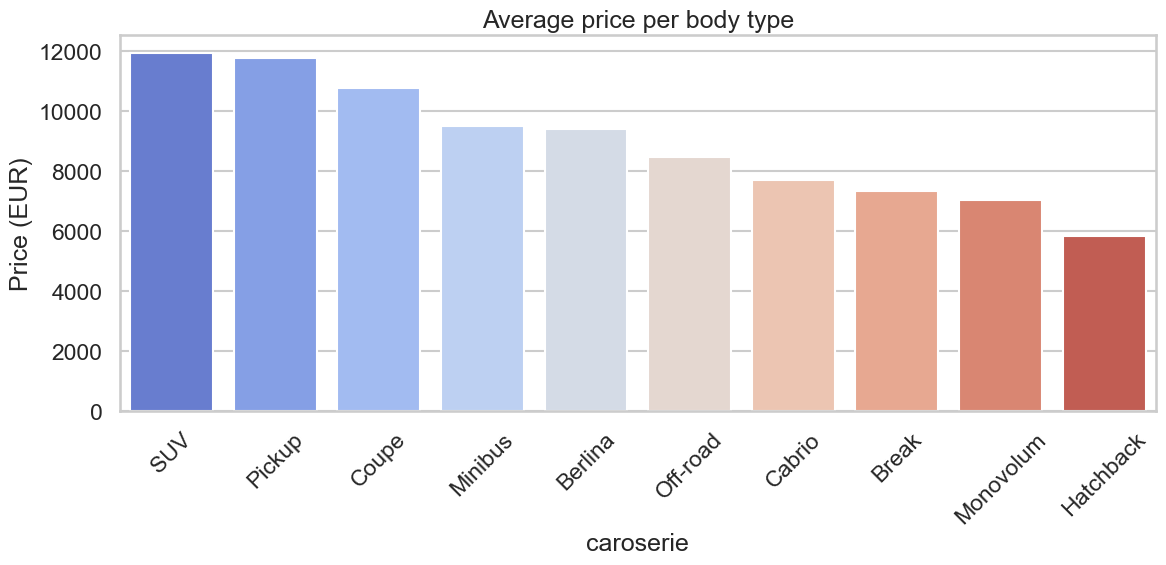

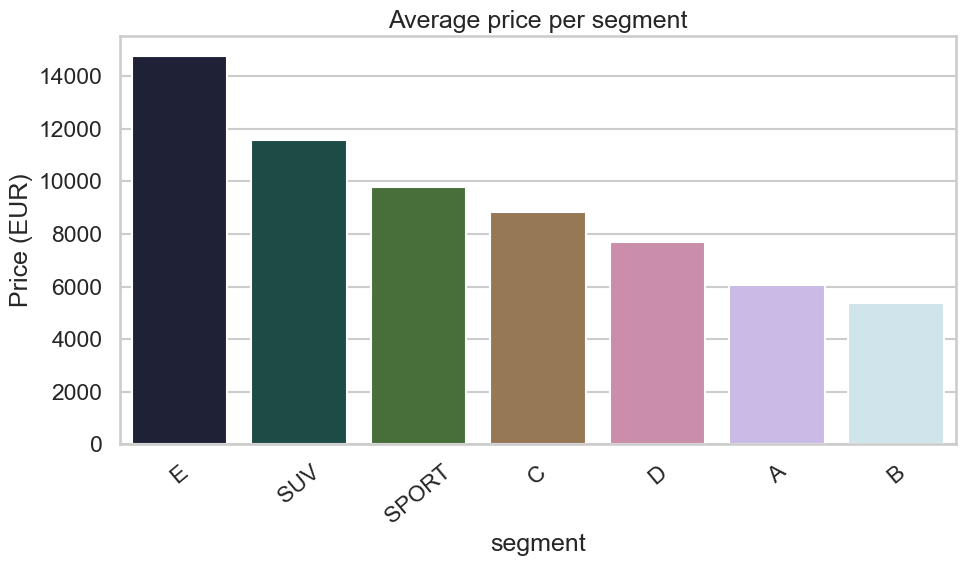

In [675]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(14,6))
brand_stats = df.groupby("marca")["pret"].mean().sort_values(ascending=False)

sns.barplot(
    x=brand_stats.index,
    y=brand_stats.values,
    palette="viridis"
)

plt.xticks(rotation=70)
plt.title("Average price per brand")
plt.ylabel("Price (EUR)")
plt.tight_layout()
plt.show()


# Boxplot version (distribution comparison)
plt.figure(figsize=(16,7))
top_brands = df['marca'].value_counts().index[:12]  # only top 12 brands
sns.boxplot(
    data=df[df['marca'].isin(top_brands)],
    x="marca",
    y="pret"
)
plt.xticks(rotation=70)
plt.title("Price distribution per brand (top 12)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
body_stats = df.groupby("caroserie")["pret"].mean().sort_values(ascending=False)

sns.barplot(
    x=body_stats.index,
    y=body_stats.values,
    palette="coolwarm"
)

plt.title("Average price per body type")
plt.ylabel("Price (EUR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))
segment_stats = df.groupby("segment")["pret"].mean().sort_values(ascending=False)

sns.barplot(
    x=segment_stats.index,
    y=segment_stats.values,
    palette="cubehelix"
)

plt.title("Average price per segment")
plt.ylabel("Price (EUR)")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


In [676]:
df_filtered.to_csv("data_frame")

In [677]:
import pandas as pd
import numpy as np
import pickle  # or joblib, depending on how you saved the model

# 1. Load your data_frame
df = df_filtered.copy()  # or the actual path to your CSV

# 2. Load the trained model (HistGBR pipeline)
model = joblib.load("backend/models_storage/best_model_histgbr.pkl")

# 3. Select the same features used in training
numeric_features = [
    "condition_score",
    "modern_tech_score",
    "age_squared",
    "age",
    "age_cubed",
    "luxury_index",
    "fuel_efficiency_score",
    "power_x_cc",
    "torque_proxy",
    "body_x_power",
    "putere",
    "age_mileage_wear",
    "capacitate motor",
    "age_decay",
    "an fabricatie",
    "mileage_efficiency",
    "age_x_power",
    "premium_age_factor",
    "economy_power",
    "putere_per_liter",
]

categorical_features = [
    "marca",
    "model",
    "combustibil",
    "caroserie",
    "culoare",
    "cutie viteza",
    "segment",
    "engine_type",
    "age_category",
    "rulaj_cat",
]

feature_cols = numeric_features + categorical_features

# Make sure all columns exist (this will raise if something is missing)
missing = [c for c in feature_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in df: {missing}")

X = df[feature_cols]

# 4. Predict log(price+1) and transform back
y_log = model.predict(X)          # model was trained on log1p(price)
df["pred"] = np.expm1(y_log)      # convert back to EUR

# 5. (Optional) compute residuals
df["residual"] = df["pret"] - df["pred"]

# 6. Save for later analysis / upload
df.to_csv("data_frame_with_pred.csv", index=False)


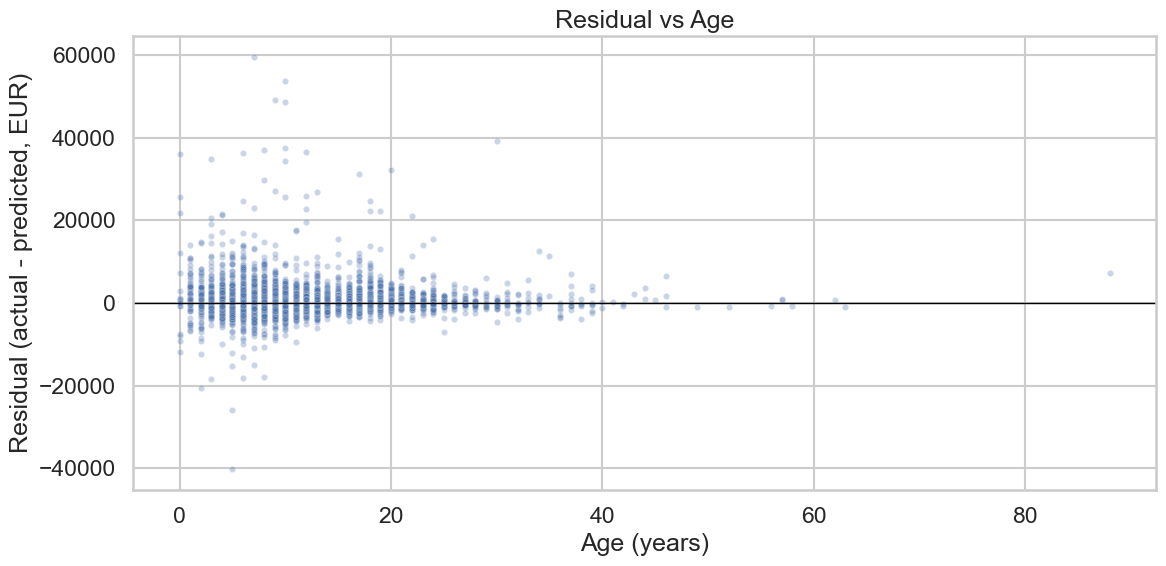

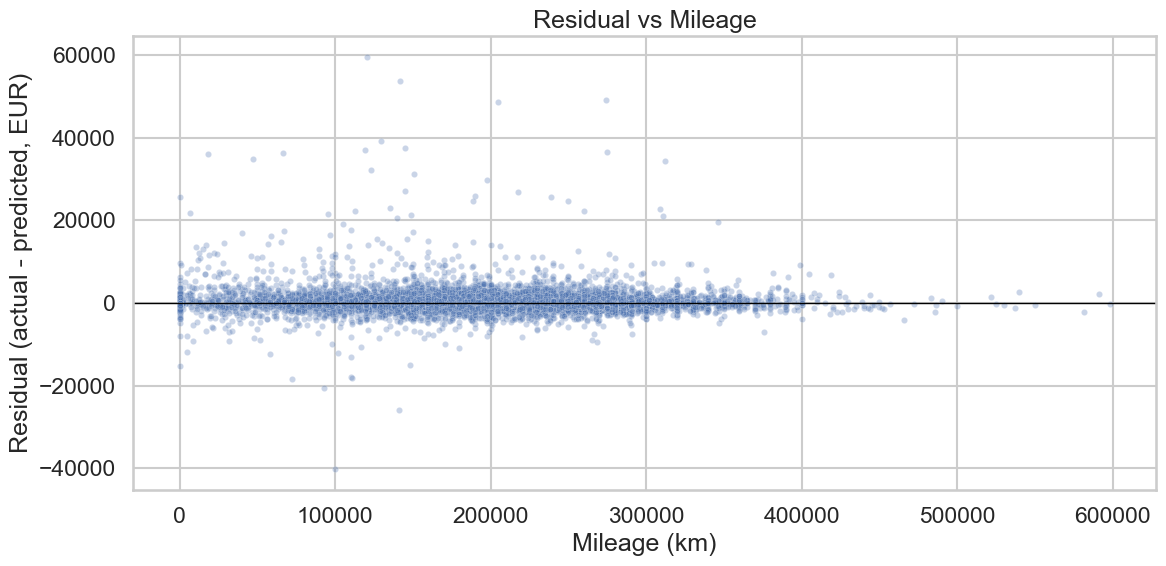

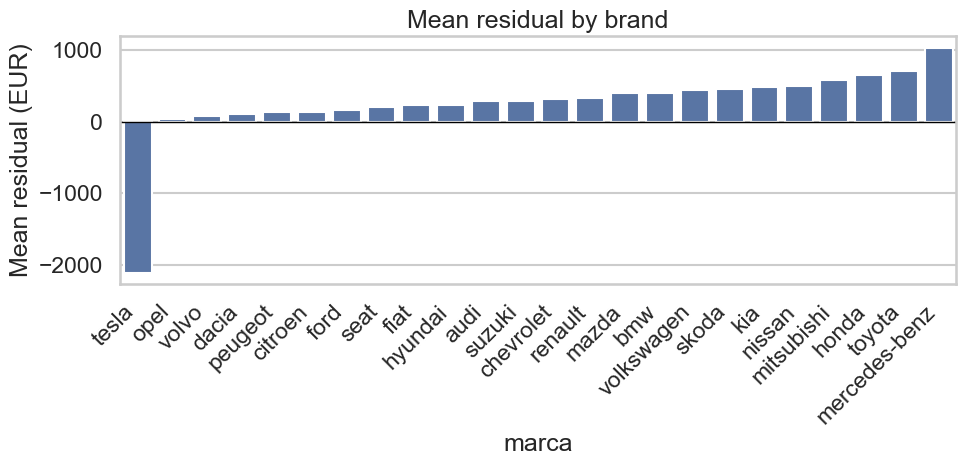

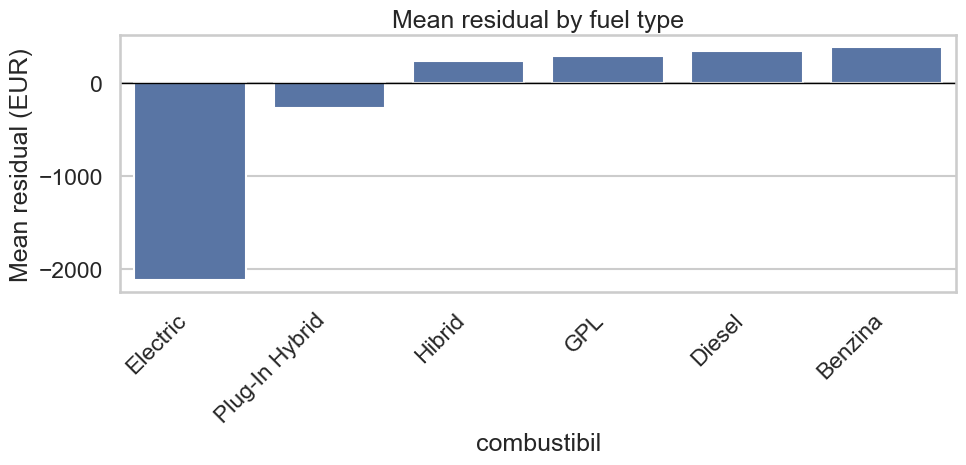

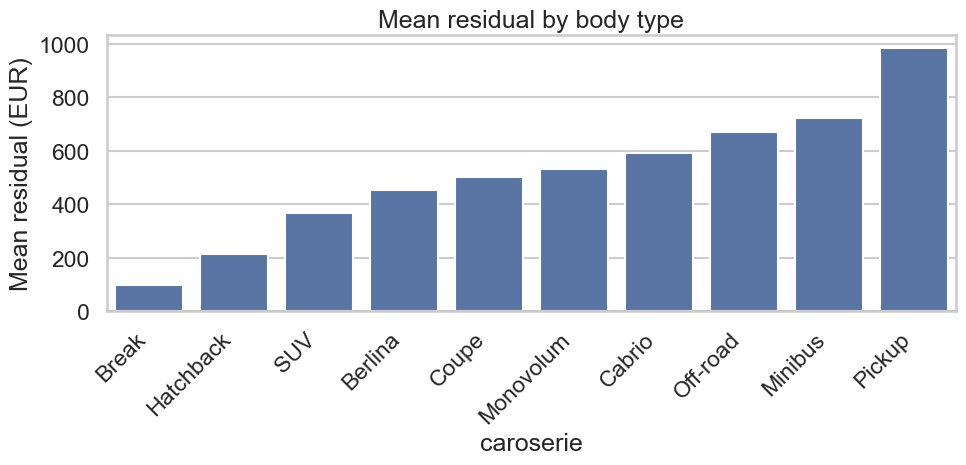

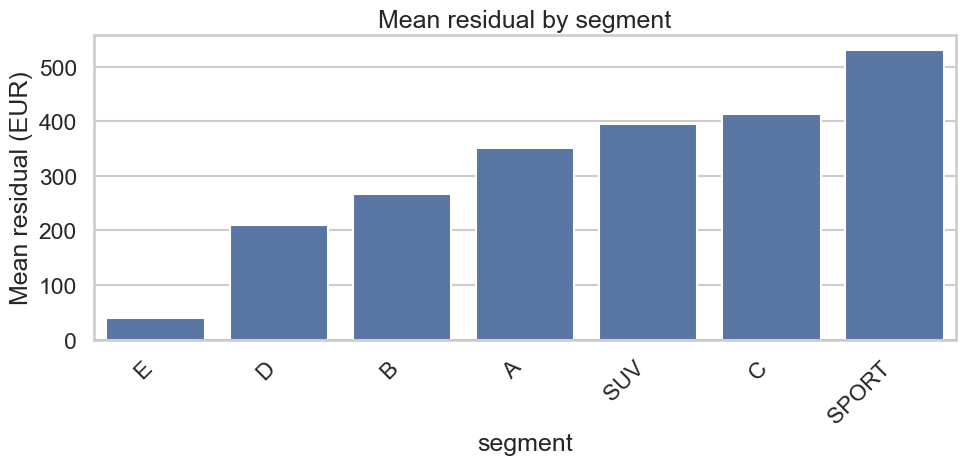

In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# ============================================================
# 1. Load data and prepare residual
# ============================================================
df = pd.read_csv("data_frame_with_pred.csv")  # adjust path if needed

# If residual is not already stored, compute it
if "residual" not in df.columns:
    if {"pret", "pred"}.issubset(df.columns):
        df["residual"] = df["pret"] - df["pred"]
    else:
        raise ValueError("Columns 'pret' and/or 'pred' are missing.")

# ============================================================
# 2. Residual vs Age
# ============================================================
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="age", y="residual", alpha=0.3, s=20)
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Age (years)")
plt.ylabel("Residual (actual - predicted, EUR)")
plt.title("Residual vs Age")
plt.tight_layout()
plt.show()

# ============================================================
# 3. Residual vs Mileage (rulaj)
# ============================================================
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="rulaj", y="residual", alpha=0.3, s=20)
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Mileage (km)")
plt.ylabel("Residual (actual - predicted, EUR)")
plt.title("Residual vs Mileage")
plt.tight_layout()
plt.show()

# ============================================================
# Helper: mean residual by category
# ============================================================
def plot_mean_residual_by(col_name: str, title: str):
    grouped = (
        df.groupby(col_name)["residual"]
        .mean()
        .sort_values()
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=grouped.index,
        y=grouped.values
    )
    plt.axhline(0, color="black", linewidth=1)
    plt.ylabel("Mean residual (EUR)")
    plt.xlabel(col_name)
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# ============================================================
# 4. Mean residual by brand
# ============================================================
plot_mean_residual_by("marca", "Mean residual by brand")

# ============================================================
# 5. Mean residual by fuel type
# ============================================================
plot_mean_residual_by("combustibil", "Mean residual by fuel type")

# ============================================================
# 6. Mean residual by body type
# ============================================================
plot_mean_residual_by("caroserie", "Mean residual by body type")

# ============================================================
# 7. Mean residual by segment
# ============================================================
plot_mean_residual_by("segment", "Mean residual by segment")


In [679]:
import pandas as pd
import numpy as np

# ============================================================
# 0. Load data and ensure residual column
# ============================================================

# Adjust path if needed
df = pd.read_csv("data_frame_with_pred.csv")

# Ensure residual column is present
if "residual" not in df.columns:
    if {"pret", "pred"}.issubset(df.columns):
        df["residual"] = df["pret"] - df["pred"]
    else:
        raise ValueError("Columns 'pret' and 'pred' are required to compute residuals.")

# Quick sanity check
print(df[["pret", "pred", "residual"]].head())

# ============================================================
# 1. Helper: generic residual-based calibration table
# ============================================================

def residual_calibration_table(
    df: pd.DataFrame,
    col: str,
    min_count: int = 1,
    sort_by: str = "multiplier",
    ascending: bool = True
) -> pd.DataFrame:
    """
    For a categorical feature `col`, compute:
      - count
      - mean_true  (mean pret)
      - mean_pred  (mean pred)
      - mean_resid (mean residual)
      - multiplier = mean_true / mean_pred

    Returns a DataFrame filtered to categories with count >= min_count,
    sorted by `sort_by`.
    """
    grp = (
        df.groupby(col)
          .agg(
              count=("residual", "count"),
              mean_true=("pret", "mean"),
              mean_pred=("pred", "mean"),
              mean_resid=("residual", "mean"),
          )
    )
    grp["multiplier"] = grp["mean_true"] / grp["mean_pred"]
    grp = grp[grp["count"] >= min_count].copy()
    grp = grp.sort_values(by=sort_by, ascending=ascending)
    return grp

# ============================================================
# 2. Compute calibration tables for all key categorical features
# ============================================================

categorical_features = [
    "marca",
    "segment",
    "age_category",
    "rulaj_cat",
    "combustibil",
    "caroserie",
    "engine_type",
]

calibration_tables = {}

for col in categorical_features:
    if col not in df.columns:
        print(f"[WARN] Column '{col}' not in df, skipping.")
        continue
    tbl = residual_calibration_table(df, col, min_count=30)  # ignore tiny groups
    calibration_tables[col] = tbl
    print(f"\n====== {col.upper()} calibration table ======")
    print(tbl)

# Example: extract brand multipliers dict directly from table
if "marca" in calibration_tables:
    brand_tbl = calibration_tables["marca"]
    brand_multipliers_from_data = (
        brand_tbl["multiplier"]
        .rename(lambda x: str(x).strip().lower())  # keys lowercase
        .to_dict()
    )
    print("\nbrand_multipliers_from_data = {")
    for k, v in brand_multipliers_from_data.items():
        print(f"    '{k}': {v:.6f},")
    print("}")

# Same for segment, age_category, etc. as needed
# Example for segment:
if "segment" in calibration_tables:
    seg_tbl = calibration_tables["segment"]
    segment_multipliers_from_data = (
        seg_tbl["multiplier"]
        .rename(lambda x: str(x).strip().upper())
        .to_dict()
    )
    print("\nsegment_multipliers_from_data = {")
    for k, v in segment_multipliers_from_data.items():
        print(f"    '{k}': {v:.6f},")
    print("}")

# You can repeat for age_category, rulaj_cat, combustibil, caroserie, engine_type
# or build a loop that formats them automatically.

# ============================================================
# 3. Numeric residual relationships (correlations)
# ============================================================

# Optional: if you want to see which numeric features correlate with residuals
numeric_candidates = [
    "age",
    "rulaj",
    "putere",
    "capacitate motor",
    "fuel_efficiency_score",
    "age_mileage_wear",
    "power_x_cc",
    "torque_proxy",
    "luxury_index",
    "economy_power",
    "modern_tech_score",
    "condition_score",
]

corrs = {}
for col in numeric_candidates:
    if col not in df.columns:
        continue
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    c = df["residual"].corr(df[col])
    corrs[col] = c

print("\n====== Correlation of numeric features with residual ======")
for col, c in sorted(corrs.items(), key=lambda kv: kv[1]):
    print(f"{col:25s}: {c: .4f}")

# ============================================================
# 4. Age × Mileage (2D) residual-based multipliers
# ============================================================

# Define bins (you can tweak these)
age_bins = [0, 5, 10, 15, 20, 25, 100]
age_labels = [f"[{age_bins[i]}, {age_bins[i+1]})" for i in range(len(age_bins)-1)]

km_bins  = [0, 60_000, 120_000, 180_000, 240_000, 300_000, 400_000, 1_000_000]
km_labels = [f"[{km_bins[i]}, {km_bins[i+1]})" for i in range(len(km_bins)-1)]

# Create binned columns
df["age_bin"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
df["km_bin"]  = pd.cut(df["rulaj"], bins=km_bins, labels=km_labels, right=False)

age_km_tbl = (
    df.groupby(["age_bin", "km_bin"])
      .agg(
          count=("residual", "count"),
          mean_true=("pret", "mean"),
          mean_pred=("pred", "mean"),
          mean_resid=("residual", "mean"),
      )
      .reset_index()
)

age_km_tbl["multiplier"] = age_km_tbl["mean_true"] / age_km_tbl["mean_pred"]

print("\n====== Raw age × km calibration table ======")
print(age_km_tbl)

# Optional: filter to bins with enough data
min_count_age_km = 20
age_km_tbl_filtered = age_km_tbl[age_km_tbl["count"] >= min_count_age_km].copy()

print("\n====== Filtered age × km table (count >= 20) ======")
print(age_km_tbl_filtered)

# ============================================================
# 5. Monotone smoothing and capping for age × km multipliers
# ============================================================

# Pivot to age (rows) × km (columns)
pivot = age_km_tbl_filtered.pivot(index="age_bin", columns="km_bin", values="multiplier")

# Ensure we have all labels as index/columns (even if NaN)
pivot = pivot.reindex(index=age_labels, columns=km_labels)

print("\n====== Raw age × km multiplier matrix ======")
print(pivot)

# Simple monotone smoothing:
# - Enforce that multipliers do not increase with age (downwards),
# - and do not increase with km (to the right).
# - Also cap to [0.5, 1.3].

def monotone_smooth_age_km_matrix(
    M: pd.DataFrame,
    min_factor: float = 0.7,   # allow real penalties
    max_factor: float = 1.3    # cap extreme boosts
) -> pd.DataFrame:
    """
    Monotone smoothing for age × km multiplier matrix:

    - Interpolates missing (NaN) values from neighbors.
    - Enforces non-increasing multipliers with age (down the rows).
    - Enforces non-increasing multipliers with km (to the right).
    - Clips to [min_factor, max_factor].
    """
    M = M.copy().astype(float)

    # ---------------------------------------------------------
    # 1) Interpolate missing values instead of forcing 1.0
    # ---------------------------------------------------------

    # Interpolate down columns (age direction)
    M = M.apply(lambda col: col.interpolate(limit_direction="both"), axis=0)
    # Interpolate across rows (km direction)
    M = M.apply(lambda row: row.interpolate(limit_direction="both"), axis=1)

    # If anything still NaN (isolated bins), fill with overall median
    overall_median = np.nanmedian(M.values)
    M = M.fillna(overall_median)

    # ---------------------------------------------------------
    # 2) Enforce non-increasing with age (older = not more expensive)
    # ---------------------------------------------------------
    for col in M.columns:
        running_min = None
        for idx in M.index:
            val = M.loc[idx, col]
            if running_min is None:
                running_min = val
            else:
                running_min = min(running_min, val)
            M.loc[idx, col] = running_min

    # ---------------------------------------------------------
    # 3) Enforce non-increasing with km (more km = not more expensive)
    # ---------------------------------------------------------
    for idx in M.index:
        running_min = None
        for col in M.columns:
            val = M.loc[idx, col]
            if running_min is None:
                running_min = val
            else:
                running_min = min(running_min, val)
            M.loc[idx, col] = running_min

    # ---------------------------------------------------------
    # 4) Clip to reasonable range
    # ---------------------------------------------------------
    M = M.clip(lower=min_factor, upper=max_factor)

    return M

pivot_smooth = monotone_smooth_age_km_matrix(pivot, min_factor=0.5, max_factor=1.3)

print("\n====== Smoothed age × km multiplier matrix (monotone, capped) ======")
print(pivot_smooth)

# ============================================================
# 6. Export smoothed age × km multipliers as dict for predictor
# ============================================================

age_km_multipliers = {}

for age_bin in pivot_smooth.index:
    for km_bin in pivot_smooth.columns:
        m = float(pivot_smooth.loc[age_bin, km_bin])
        key = (str(age_bin), str(km_bin))
        age_km_multipliers[key] = m

print("\nage_km_multipliers = {")
for k, v in age_km_multipliers.items():
    print(f"    {k}: {v:.6f},")
print("}")


     pret         pred     residual
0  5800.0  4581.974730  1218.025270
1  6990.0  6264.406672   725.593328
2  9900.0  9737.896961   162.103039
3  3490.0  7298.535237 -3808.535237
4  8450.0  5324.179727  3125.820273

====== MARCA calibration table ======
               count     mean_true     mean_pred   mean_resid  multiplier
marca                                                                    
volvo            271  13423.771218  13343.988154    79.783064    1.005979
opel             526   5263.030418   5221.939581    41.090837    1.007869
dacia            519   7072.256262   6966.720020   105.536242    1.015149
peugeot          348   7098.948276   6966.552590   132.395686    1.019004
ford             478   7845.713389   7689.699042   156.014347    1.020289
citroen          367   6160.806540   6023.452442   137.354098    1.022803
audi             528  12550.219697  12258.495134   291.724563    1.023798
hyundai          286   9587.160839   9349.849299   237.311540    1.025381
bmw  